# Assignment 2: Building MLPs, CNNs, and Generative Models

## Task 1: Learn the basics of Keras API for Tensorflow

In [1]:
from __future__ import print_function
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import mnist, fashion_mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

### Experiment with official repository example mnist_mlp.py

In [3]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.2426 - accuracy: 0.9262 - val_loss: 0.0938 - val_accuracy: 0.9701
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1020 - accuracy: 0.9693 - val_loss: 0.0832 - val_accuracy: 0.9761
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0763 - accuracy: 0.9765 - val_loss: 0.0707 - val_accuracy: 0.9790
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0600 - accuracy: 0.9824 - val_loss: 0.1012 - val_accuracy: 0.9734
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0521 - accuracy: 0.9846 - val_loss: 0.0756 - val_accuracy: 0.9806
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0436 - accuracy: 0.9867 - val_loss: 0.0765 - val_accuracy: 0.9824
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0377 - accuracy: 0.9888 - val_loss: 0.0771 - val_accuracy: 0.9818
Epoch 

### Experiment with official repository example mnist_cnn.py

In [5]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_6 (Dense)             (None, 128)       

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 5s 9ms/step - loss: 0.9283 - accuracy: 0.7245 - val_loss: 0.6872 - val_accuracy: 0.8554
Epoch 2/12
469/469 [==============================] - 4s 8ms/step - loss: 0.8794 - accuracy: 0.7378 - val_loss: 0.6414 - val_accuracy: 0.8600
Epoch 3/12
469/469 [==============================] - 4s 8ms/step - loss: 0.8384 - accuracy: 0.7482 - val_loss: 0.6013 - val_accuracy: 0.8638
Epoch 4/12
469/469 [==============================] - 4s 8ms/step - loss: 0.7978 - accuracy: 0.7595 - val_loss: 0.5674 - val_accuracy: 0.8679
Epoch 5/12
469/469 [==============================] - 4s 8ms/step - loss: 0.7712 - accuracy: 0.7649 - val_loss: 0.5392 - val_accuracy: 0.8710
Epoch 6/12
469/469 [==============================] - 4s 8ms/step - loss: 0.7403 - accuracy: 0.7750 - val_loss: 0.5140 - val_accuracy: 0.8739
Epoch 7/12
469/469 [==============================] - 4s 8ms/step - loss: 0.7147 - accuracy: 0.7825 - val_loss: 0.4924 - val_accuracy: 0.8771
Epoch 

### Fashion MNIST MLP

In [2]:
batch_size = 128
num_classes = 10
epochs = 30

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


#### MLP: Baseline (Example in the textbook)

In [4]:
K.clear_session()
model = Sequential()
model.add(Dense(300, activation="relu", input_shape=(784,)))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
375/375 [==============================] - 3s 5ms/step - loss: 0.5826 - accuracy: 0.7877 - val_loss: 0.4966 - val_accuracy: 0.8132
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 0.3951 - accuracy: 0.8545 - val_loss: 0.4153 - val_accuracy: 0.8511
Epoch 3/30
375/375 [==============================] - 2s 4ms/step - loss: 0.3507 - accuracy: 0.8694 - val_loss: 0.3645 - val_accuracy: 0.8682
Epoch 4/30
375/375 [==============================] - 2s 4ms/step - loss: 0.3191 - accuracy: 0.8807 - val_loss: 0.3272 - val_accuracy: 0.8832
Epoch 5/30
375/375 [==============================] - 2s 4ms/step - loss: 0.3007 - accuracy: 0.8879 - val_loss: 0.3244 - val_accuracy: 0.8845
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2815 - accuracy: 0.8941 - val_loss: 0.3813 - val_accuracy: 0.8621
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 0.2677 - accuracy: 0.9000 - val_loss: 0.3305 - val_accuracy: 0.8845
Epoch 

#### Experiments with MLP network

In [3]:
def mlp_models(num_layers=3, arg_dict=arg_dict, dropout=False, dropout_lst=[], optimizer=RMSprop(), batch=128, info=""):
    K.clear_session()
    print(f"{info}")
    model = keras.models.Sequential()
    model.add(Input(shape=(784,)))
    for i in range(num_layers):
        model.add(Dense(arg_dict[i][0], 
                     activation=arg_dict[i][1], 
                     kernel_initializer=arg_dict[i][2], 
                     kernel_regularizer=arg_dict[i][3]))
        if dropout and i != (num_layers - 1):
            model.add(Dropout(dropout_lst[i]))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])   
    
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath="./temp.hdf5",
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)
    
    early_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)
    
    history = model.fit(x_train, y_train,
                    batch_size=batch,
                    epochs=50,
                    verbose=0,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback, early_callback])
    model.load_weights("./temp.hdf5")
    score = model.evaluate(x_test, y_test, verbose=0) 
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history.history, score

##### Architecture: Adding / removing layers

In [6]:
arg_dict = [{0: (512, "relu", "glorot_uniform", None),
             1: (10, "softmax", "glorot_uniform", None),
            }, 
            {0: (512, "relu", "glorot_uniform", None),
             1: (128, "relu", "glorot_uniform", None),
             2: (10, "softmax", "glorot_uniform", None),
            },
            {0: (512, "relu", "glorot_uniform", None),
             1: (128, "relu", "glorot_uniform", None),
             2: (64, "relu", "glorot_uniform", None),
             3: (10, "softmax", "glorot_uniform", None),
            }]
history_lst = list()
info_lst = ["Two layers", "Three layers", "Four layers"]
for trial in range(3):
    his, _ = mlp_models(num_layers=trial + 2, arg_dict=arg_dict[trial], info=info_lst[trial])
    history_lst.append(his)

Two layers
Test loss: 0.36792272329330444
Test accuracy: 0.8910999894142151
Three layers
Test loss: 0.3622269034385681
Test accuracy: 0.8842999935150146
Four layers
Test loss: 0.3582518398761749
Test accuracy: 0.8841999769210815


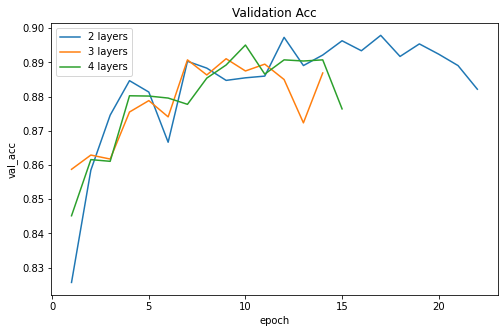

In [14]:
plt.rcParams["figure.figsize"] = (8, 5)
for index in range(len(history_lst)):
    acc = history_lst[index]["val_accuracy"]
    plt.plot(list(range(1, len(acc) + 1)), acc, label=f"{index + 2} layers")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("val_acc")
plt.title("Validation Acc")
plt.show()

##### Architecture: Number of units

In [19]:
arg_dict = [{0: (512, "relu", "glorot_uniform", None),
             1: (10, "softmax", "glorot_uniform", None),
            }, 
           {0: (256, "relu", "glorot_uniform", None),
            1: (10, "softmax", "glorot_uniform", None),
            }, 
           {0: (128, "relu", "glorot_uniform", None),
            1: (10, "softmax", "glorot_uniform", None),
            },]
history_lst = list()
info_lst = ["512", "256", "128"]
for trial in range(3):
    his, _ = mlp_models(num_layers=2, arg_dict=arg_dict[trial], info=info_lst[trial])
    history_lst.append(his)

512
Test loss: 0.3538702428340912
Test accuracy: 0.8858000040054321
256
Test loss: 0.3302786648273468
Test accuracy: 0.8847000002861023
128
Test loss: 0.36588016152381897
Test accuracy: 0.8876000046730042


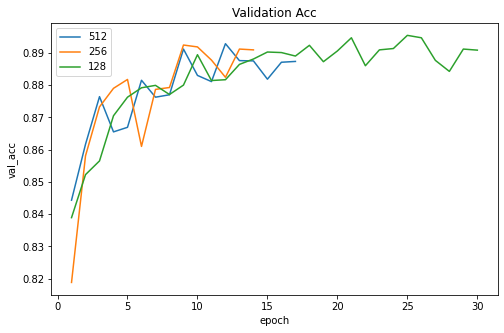

In [20]:
for index in range(len(history_lst)):
    acc = history_lst[index]["val_accuracy"]
    plt.plot(list(range(1, len(acc) + 1)), acc, label=f"{info_lst[index]}")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("val_acc")
plt.title("Validation Acc")
plt.show()

##### Initializations / Activations / Optimizers / Regularizations

In [11]:
# No dropout
initialization_lst = [tf.keras.initializers.GlorotUniform(),
                      tf.keras.initializers.RandomNormal(mean=0., stddev=1.),
                      tf.keras.initializers.GlorotNormal(),
                     ]
initialization_info = ["glorot uniform", "random normal", "glorot normal"]
activation_lst = ["relu", "sigmoid", "tanh"]
optimizer_lst = [tf.keras.optimizers.RMSprop(),
                 tf.keras.optimizers.Adam(),
                 tf.keras.optimizers.Adam(learning_rate=0.01),
                 ]
optimizer_info = ["RMSprop", "adam default", "adam 0.01"]
regularization_lst = [regularizers.L1(l1=0.01), regularizers.L2(l2=0.01), None]
regularization_info = ["L1", "L2", "None"]

arg_dict = list()
for a in range(3):
    initialization = initialization_lst[a]
    for b in range(3):
        activation = activation_lst[b]
        for c in range(3):
            optimizer = optimizer_lst[c]
            for d in range(3):
                regularization = regularization_lst[d]
                info = " / ".join([initialization_info[a], activation_lst[b], optimizer_info[c], regularization_info[d]])
                arg_dict.append({0: (128, activation, initialization, regularization),
                                 1: (10, "softmax", initialization, None),
                                 "op": optimizer,
                                 "info": info},)
print(f"Parameter Settings: {len(arg_dict)}.")
print(f"Example: {arg_dict[0]}")

Parameter Settings: 81.
Example: {0: (128, 'relu', <keras.initializers.initializers_v2.GlorotUniform object at 0x7f502b5063d0>, <keras.regularizers.L1 object at 0x7f502b467b80>), 1: (10, 'softmax', <keras.initializers.initializers_v2.GlorotUniform object at 0x7f502b5063d0>, None), 'op': <keras.optimizers.optimizer_v2.rmsprop.RMSprop object at 0x7f502b4671c0>, 'info': 'glorot uniform / relu / RMSprop / L1'}


In [12]:
score_lst = list()
records = list()
for trial in range(len(arg_dict)):
    _, score = mlp_models(num_layers=2, arg_dict=arg_dict[trial], optimizer=arg_dict[trial]["op"], info=arg_dict[trial]["info"])
    records.append(arg_dict[trial]["info"])
    score_lst.append(score)

glorot uniform / relu / RMSprop / L1
Test loss: 1.3726140260696411
Test accuracy: 0.7714999914169312
glorot uniform / relu / RMSprop / L2
Test loss: 0.6088033318519592
Test accuracy: 0.8213000297546387
glorot uniform / relu / RMSprop / None
Test loss: 0.3491945266723633
Test accuracy: 0.8755999803543091
glorot uniform / relu / adam default / L1
Test loss: 0.9702183604240417
Test accuracy: 0.7858999967575073
glorot uniform / relu / adam default / L2
Test loss: 0.5215848684310913
Test accuracy: 0.8420000076293945
glorot uniform / relu / adam default / None
Test loss: 0.35733363032341003
Test accuracy: 0.8827000260353088
glorot uniform / relu / adam 0.01 / L1
Test loss: 2.304311513900757
Test accuracy: 0.7472000122070312
glorot uniform / relu / adam 0.01 / L2
Test loss: 0.7077142000198364
Test accuracy: 0.7990000247955322
glorot uniform / relu / adam 0.01 / None
Test loss: 0.4366047978401184
Test accuracy: 0.8478000164031982
glorot uniform / sigmoid / RMSprop / L1
Test loss: 1.66621112823

In [19]:
best = np.argmax(np.array(score_lst), axis=0)[1]
print(f"Best Settings: {records[best]}.")
print(f"Best acc: {score_lst[best][1]}.")

Best Settings: glorot uniform / sigmoid / RMSprop / None.
Best acc: 0.8888000249862671.


In [22]:
# With dropout
## Setting 1
dropout_r = [0.1, 0.3, 0.5]
arg_dict = {0: (128, "sigmoid", "glorot_uniform", None),
            1: (10, "softmax", "glorot_uniform", None),
            }
info_lst = ["0.1", "0.3", "0.5"]
for trial in range(3):
    mlp_models(num_layers=2, arg_dict=arg_dict, dropout=True, dropout_lst=dropout_r, info=info_lst[trial])

0.1
Test loss: 0.33404281735420227
Test accuracy: 0.8823999762535095
0.3
Test loss: 0.3318142592906952
Test accuracy: 0.883400022983551
0.5
Test loss: 0.32462039589881897
Test accuracy: 0.8871999979019165


In [24]:
## Setting 2
dropout_r = [0.1, 0.3, 0.5]
arg_dict = {0: (512, "relu", "glorot_uniform", None),
            1: (10, "softmax", "glorot_uniform", None),
            }
info_lst = ["0.1", "0.3", "0.5"]
for trial in range(3):
    mlp_models(num_layers=2, arg_dict=arg_dict, dropout=True, dropout_lst=dropout_r, info=info_lst[trial])

0.1
Test loss: 0.35022810101509094
Test accuracy: 0.8748999834060669
0.3
Test loss: 0.38686779141426086
Test accuracy: 0.8919000029563904
0.5
Test loss: 0.3649497628211975
Test accuracy: 0.887499988079071


In [25]:
## Setting 3
dropout_r = [0.1, 0.3, 0.5]
arg_dict = {0: (128, "relu", "glorot_uniform", None),
            1: (10, "softmax", "glorot_uniform", None),
            }
info_lst = ["0.1", "0.3", "0.5"]
for trial in range(3):
    mlp_models(num_layers=2, arg_dict=arg_dict, dropout=True, dropout_lst=dropout_r, info=info_lst[trial])

0.1
Test loss: 0.34795081615448
Test accuracy: 0.8891000151634216
0.3
Test loss: 0.35057082772254944
Test accuracy: 0.8833000063896179
0.5
Test loss: 0.3354928195476532
Test accuracy: 0.8844000101089478


### Fashion MNIST CNN

#### CNN: Baseline (Example in the textbook)

In [2]:
batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
model = keras.models.Sequential([ 
  keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"), 
  keras.layers.Dropout(0.5), 
  keras.layers.Dense(64, activation="relu"), 
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation="softmax") 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)        

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
375/375 [==============================] - 7s 16ms/step - loss: 0.2720 - accuracy: 0.9116 - val_loss: 0.2696 - val_accuracy: 0.9054
Epoch 2/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2561 - accuracy: 0.9172 - val_loss: 0.3072 - val_accuracy: 0.9113
Epoch 3/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2519 - accuracy: 0.9180 - val_loss: 0.2757 - val_accuracy: 0.9093
Epoch 4/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2480 - accuracy: 0.9199 - val_loss: 0.3042 - val_accuracy: 0.9050
Epoch 5/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2508 - accuracy: 0.9205 - val_loss: 0.2742 - val_accuracy: 0.9133
Epoch 6/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2428 - accuracy: 0.9206 - val_loss: 0.2810 - val_accuracy: 0.9142
Epoch 7/30
375/375 [==============================] - 6s 15ms/step - loss: 0.2450 - accuracy: 0.9215 - val_loss: 0.2821 - val_accuracy: 0.9122

#### Experiments with CNN network

##### Architecture: Adding / removing layers

In [6]:
batch_size = 128
epochs = 50

model_checkpoint_callback1 = tf.keras.callbacks.ModelCheckpoint(
    filepath="./temp.hdf5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_callback1 = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

model1 = keras.models.Sequential([ 
  keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"), 
  keras.layers.Dropout(0.5), 
  keras.layers.Dense(64, activation="relu"), 
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation="softmax") 
])

model1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history1 = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback1, early_callback1])
model1.load_weights("./temp.hdf5")
score = model1.evaluate(x_test, y_test, verbose=0)
print('Baseline')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Remove layers
model2 = keras.models.Sequential([ 
  keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"), 
  keras.layers.Dropout(0.5), 
  keras.layers.Dense(64, activation="relu"), 
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation="softmax") 
])

model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
    filepath="./temp.hdf5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_callback2 = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

model2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history2 = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback2, early_callback2])
model2.load_weights("./temp.hdf5")
score = model2.evaluate(x_test, y_test, verbose=0)
print('Remove layers')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Add layers
model3 = keras.models.Sequential([ 
  keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
  keras.layers.Conv2D(64, 7, activation="relu", padding="same"),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"), 
  keras.layers.Dropout(0.5), 
  keras.layers.Dense(64, activation="relu"), 
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation="softmax") 
])

model_checkpoint_callback3 = tf.keras.callbacks.ModelCheckpoint(
    filepath="./temp.hdf5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

early_callback3 = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

model3.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history3 = model3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback3, early_callback3])
model3.load_weights("./temp.hdf5")
score = model3.evaluate(x_test, y_test, verbose=0)
print('Add layers')
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Baseline
Test loss: 0.2642196714878082
Test accuracy: 0.9108999967575073
Remove layers
Test loss: 0.33600562810897827
Test accuracy: 0.910099983215332
Add layers
Test loss: 0.31048905849456787
Test accuracy: 0.906000018119812


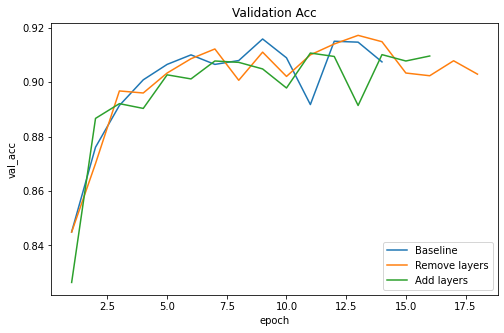

In [9]:
plt.rcParams["figure.figsize"] = (8, 5)
history_lst = [history1.history, history2.history, history3.history]
info_lst = ["Baseline", "Remove layers", "Add layers"]

for index in range(len(history_lst)):
    acc = history_lst[index]["val_accuracy"]
    plt.plot(list(range(1, len(acc) + 1)), acc, label=f"{info_lst[index]}")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("val_acc")
plt.title("Validation Acc")
plt.show()

##### Architecture: Number of filters

In [15]:
def cnn_models(filter_set=(64, 128, 256), dropout_set=(0.5, 0.5), optimizer=RMSprop(), info=""):
    print(info)
    K.clear_session()
    model = keras.models.Sequential([ 
      keras.layers.Conv2D(filter_set[0], 7, activation="relu", padding="same", input_shape=[28, 28, 1]),
      keras.layers.MaxPooling2D(2),
      keras.layers.Conv2D(filter_set[1], 3, activation="relu", padding="same"),
      keras.layers.Conv2D(filter_set[1], 3, activation="relu", padding="same"), 
      keras.layers.MaxPooling2D(2), 
      keras.layers.Conv2D(filter_set[2], 3, activation="relu", padding="same"), 
      keras.layers.Conv2D(filter_set[2], 3, activation="relu", padding="same"), 
      keras.layers.MaxPooling2D(2), keras.layers.Flatten(),
      keras.layers.Dense(128, activation="relu"), 
      keras.layers.Dropout(dropout_set[0]), 
      keras.layers.Dense(64, activation="relu"), 
      keras.layers.Dropout(dropout_set[1]),
      keras.layers.Dense(10, activation="softmax") 
    ])
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath="./temp.hdf5",
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True
    )

    early_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_split=0.2,
                        callbacks=[model_checkpoint_callback, early_callback])
    model.load_weights("./temp.hdf5")
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history, score

In [16]:
filters = [(64, 128, 256), (32, 64, 128), (128, 256, 512)]
history_lst = list()
info_lst = ["(64, 128, 128, 256, 256)", "(32, 64, 64, 128, 128)", "(128, 256, 256, 512, 512)"]
for trial in range(3):
    his, _ = cnn_models(filter_set=filters[trial], info=info_lst[trial])
    history_lst.append(his)

(64, 128, 128, 256, 256)
Test loss: 0.27673131227493286
Test accuracy: 0.9093999862670898
(32, 64, 64, 128, 128)
Test loss: 0.2916443347930908
Test accuracy: 0.9093999862670898
(128, 256, 256, 512, 512)
Test loss: 0.2906615436077118
Test accuracy: 0.90420001745224


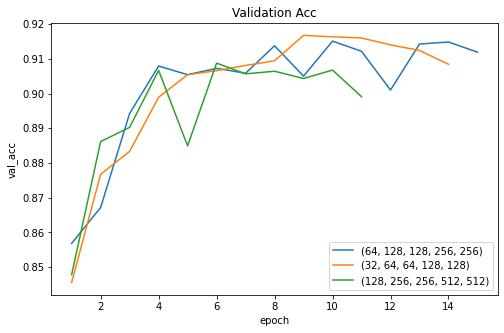

In [18]:
plt.rcParams["figure.figsize"] = (8, 5)
for index in range(len(history_lst)):
    acc = history_lst[index].history["val_accuracy"]
    plt.plot(list(range(1, len(acc) + 1)), acc, label=f"{info_lst[index]}")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("val_acc")
plt.title("Validation Acc")
plt.show()

##### Regularizations

In [19]:
# Dropout rate
dropout_r = [(0.5, 0.5), (0.3, 0.3), (0.1, 0.1)]
history_lst = list()
info_lst = ["(0.5, 0.5)", "(0.3, 0.3)", "(0.1, 0.1)"]
for trial in range(3):
    his, _ = cnn_models(filter_set=(32, 64, 128), dropout_set=dropout_r[trial], info=info_lst[trial])
    history_lst.append(his)

(0.5, 0.5)
Test loss: 0.37126895785331726
Test accuracy: 0.9104999899864197
(0.3, 0.3)
Test loss: 0.36127129197120667
Test accuracy: 0.9175000190734863
(0.1, 0.1)
Test loss: 0.3278583884239197
Test accuracy: 0.9182999730110168


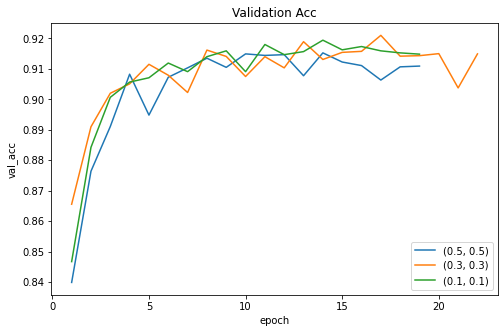

In [20]:
for index in range(len(history_lst)):
    acc = history_lst[index].history["val_accuracy"]
    plt.plot(list(range(1, len(acc) + 1)), acc, label=f"{info_lst[index]}")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("val_acc")
plt.title("Validation Acc")
plt.show()

In [22]:
optimizer_lst = [tf.keras.optimizers.RMSprop(),
                 tf.keras.optimizers.Adam(),
                 tf.keras.optimizers.Adam(learning_rate=0.01),
                 ]
info_lst = ["RMSprop", "adam default", "adam 0.01"]
history_lst = list()
for trial in range(3):
    his, _ = cnn_models(filter_set=(32, 64, 128), dropout_set=(0.1, 0.1), optimizer=optimizer_lst[trial], info=info_lst[trial])
    history_lst.append(his)

RMSprop
Test loss: 0.2767595052719116
Test accuracy: 0.9110999703407288
adam default
Test loss: 0.40711092948913574
Test accuracy: 0.9115999937057495
adam 0.01
Test loss: 0.3657534122467041
Test accuracy: 0.873199999332428


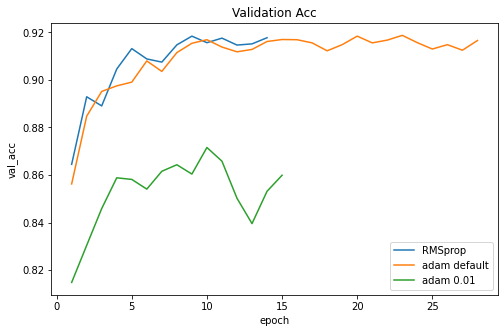

In [23]:
for index in range(len(history_lst)):
    acc = history_lst[index].history["val_accuracy"]
    plt.plot(list(range(1, len(acc) + 1)), acc, label=f"{info_lst[index]}")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("val_acc")
plt.title("Validation Acc")
plt.show()

#### Top three hyperparameter settings

**MLP**

1. Test acc: 0.892. Two layers, units: (512, 10), activations: "relu", initializations: "glorot_uniform", optimizer: RMSprop, Dropout: 0.3.

2. Test acc: 0.891. Two layers, units: (512, 10), activations: "relu", initializations: "glorot_uniform", optimizer: RMSprop, Dropout: None.

3. Test acc: 0.889. Two layers, units: (128, 10), activations: "relu", initializations: "glorot_uniform", optimizer: RMSprop, Dropout: 0.1.

**CNN**

1. Test acc: 0.918. filters: (32, 64, 64, 128, 128), optimizer: RMSprop, Dropout: (0.1, 0.1).

2. Test acc: 0.912. filters: (32, 64, 64, 128, 128), optimizer: Adam, Dropout: (0.1, 0.1).

3. Test acc: 0.911. filters: (32, 64, 64, 128, 128), optimizer: RMSprop, Dropout: (0.5, 0.5).

### CIFAR-10 MLP

#### MLP: Baseline (Example in the textbook)

In [2]:
batch_size = 128
num_classes = 10
epochs = 30

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train = x_train.reshape(50000, -1)
x_test = x_test.reshape(10000, -1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

50000 train samples
10000 test samples


In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[3072,]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 300)               921900    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 953,010
Trainable params: 953,010
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
391/391 [==============================] - 3s 6ms/step - loss: 2.1377 - accuracy: 0.2588 - val_loss: 1.8423 - val_accuracy: 0.3465
Epoch 2/30
391/391 [==============================] - 2s 5ms/step - loss: 1.8010 - accuracy: 0.3554 - val_loss: 1.7151 - val_accuracy: 0.3801
Epoch 3/30
391/391 [==============================] - 2s 5ms/step - loss: 1.7085 - accuracy: 0.3878 - val_loss: 1.6184 - val_accuracy: 0.4248
Epoch 4/30
391/391 [==============================] - 2s 5ms/step - loss: 1.6420 - accuracy: 0.4150 - val_loss: 1.6745 - val_accuracy: 0.4115
Epoch 5/30
391/391 [==============================] - 2s 5ms/step - loss: 1.5967 - accuracy: 0.4316 - val_loss: 1.5507 - val_accuracy: 0.4498
Epoch 6/30
391/391 [==============================] - 2s 5ms/step - loss: 1.5573 - accuracy: 0.4451 - val_loss: 1.5546 - val_accuracy: 0.4417
Epoch 7/30
391/391 [==============================] - 2s 5ms/step - loss: 1.5312 - accuracy: 0.4582 - val_loss: 1.4891 - val_accuracy: 0.4737
Epoch 

#### Experiments with MLP network

In [12]:
def mlp_models(num_layers=3, arg_dict=arg_dict, dropout=False, dropout_lst=[], optimizer=RMSprop(), batch=128, info=""):
    K.clear_session()
    print(f"{info}")
    model = keras.models.Sequential()
    model.add(Input(shape=(3072,)))
    for i in range(num_layers):
        model.add(Dense(arg_dict[i][0], 
                     activation=arg_dict[i][1], 
                     kernel_initializer=arg_dict[i][2], 
                     kernel_regularizer=arg_dict[i][3]))
        if dropout and i != (num_layers - 1):
            model.add(Dropout(dropout_lst[i]))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])   
    
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath="./temp.hdf5",
        save_weights_only=True,
        monitor='val_accuracy',
        mode='max',
        save_best_only=True)
    
    early_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)
    
    history = model.fit(x_train, y_train,
                    batch_size=batch,
                    epochs=50,
                    verbose=0,
                    validation_split=0.2,
                    callbacks=[model_checkpoint_callback, early_callback])
    model.load_weights("./temp.hdf5")
    score = model.evaluate(x_test, y_test, verbose=0) 
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history.history, score

##### Top three settings in Fashion MNIST

In [13]:
arg_dict = [{0: (512, "relu", "glorot_uniform", None),
             1: (10, "softmax", "glorot_uniform", None),
            },
            {0: (512, "relu", "glorot_uniform", None),
             1: (10, "softmax", "glorot_uniform", None),
            },
            {0: (128, "relu", "glorot_uniform", None),
             1: (10, "softmax", "glorot_uniform", None),
            },
           ]
dropout_lst = [0.3, None, 0.1]
info_lst = ["Top 1", "Top 2", "Top 3"]

for trial in range(3):
    mlp_models(num_layers=2, arg_dict=arg_dict[trial], dropout=dropout_lst[trial], dropout_lst=[dropout_lst[trial]], 
               optimizer=RMSprop(), batch=128, info=info_lst[trial])

Top 1
Test loss: 1.5320674180984497
Test accuracy: 0.45590001344680786
Top 2
Test loss: 1.4959994554519653
Test accuracy: 0.47350001335144043
Top 3
Test loss: 1.5920538902282715
Test accuracy: 0.430400013923645


##### New model: Best settings

In [16]:
arg_dict = {0: (512, "relu", "glorot_uniform", None),
            1: (128, "relu", "glorot_uniform", None),
            2: (32, "relu", "glorot_uniform", None),
            3: (10, "softmax", "glorot_uniform", None),
            }
_x, _y = mlp_models(num_layers=4, arg_dict=arg_dict, dropout=True, dropout_lst=[0.1, 0.1, 0.1], optimizer=RMSprop(), batch=128, info="Best model")

Best model
Test loss: 1.4300379753112793
Test accuracy: 0.4984999895095825


### CIFAR-10 CNN

#### CNN: Baseline (Example in the textbook)

In [3]:
batch_size = 128
num_classes = 10
epochs = 30

# input image dimensions
img_rows, img_cols = 32, 32

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
model = keras.models.Sequential([ 
  keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[32, 32, 3]),
  keras.layers.MaxPooling2D(2),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
  keras.layers.Conv2D(128, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
  keras.layers.MaxPooling2D(2), keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"), 
  keras.layers.Dropout(0.5), 
  keras.layers.Dense(64, activation="relu"), 
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation="softmax") ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 256)        

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/30
391/391 [==============================] - 9s 21ms/step - loss: 1.9602 - accuracy: 0.2721 - val_loss: 1.6550 - val_accuracy: 0.4039
Epoch 2/30
391/391 [==============================] - 7s 19ms/step - loss: 1.6507 - accuracy: 0.4040 - val_loss: 1.3697 - val_accuracy: 0.5068
Epoch 3/30
391/391 [==============================] - 7s 19ms/step - loss: 1.4472 - accuracy: 0.4916 - val_loss: 1.2728 - val_accuracy: 0.5440
Epoch 4/30
391/391 [==============================] - 7s 19ms/step - loss: 1.2858 - accuracy: 0.5533 - val_loss: 1.2393 - val_accuracy: 0.5699
Epoch 5/30
391/391 [==============================] - 8s 19ms/step - loss: 1.1543 - accuracy: 0.6071 - val_loss: 1.0342 - val_accuracy: 0.6490
Epoch 6/30
391/391 [==============================] - 7s 19ms/step - loss: 1.0417 - accuracy: 0.6524 - val_loss: 0.9616 - val_accuracy: 0.6756
Epoch 7/30
391/391 [==============================] - 8s 19ms/step - loss: 0.9627 - accuracy: 0.6822 - val_loss: 1.1122 - val_accuracy: 0.6502

#### Experiments with CNN network

In [9]:
def cnn_models(filter_set=(32, 64, 128), dropout_set=(0.1, 0.1), optimizer=RMSprop(), info=""):
    print(info)
    K.clear_session()
    model = keras.models.Sequential([ 
      keras.layers.Conv2D(filter_set[0], 7, activation="relu", padding="same", input_shape=[32, 32, 3]),
      keras.layers.MaxPooling2D(2),
      keras.layers.Conv2D(filter_set[1], 3, activation="relu", padding="same"),
      keras.layers.Conv2D(filter_set[1], 3, activation="relu", padding="same"), 
      keras.layers.MaxPooling2D(2), 
      keras.layers.Conv2D(filter_set[2], 3, activation="relu", padding="same"), 
      keras.layers.Conv2D(filter_set[2], 3, activation="relu", padding="same"), 
      keras.layers.MaxPooling2D(2), keras.layers.Flatten(),
      keras.layers.Dense(128, activation="relu"), 
      keras.layers.Dropout(dropout_set[0]), 
      keras.layers.Dense(64, activation="relu"), 
      keras.layers.Dropout(dropout_set[1]),
      keras.layers.Dense(10, activation="softmax") 
    ])
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath="./temp.hdf5",
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True
    )

    early_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_split=0.2,
                        callbacks=[model_checkpoint_callback, early_callback])
    model.load_weights("./temp.hdf5")
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history, score

##### Top three settings in Fashion MNIST

In [10]:
_x, _y = cnn_models(info="Top 1")
_x, _y = cnn_models(optimizer=tf.keras.optimizers.Adam(), info="Top 2")
_x, _y = cnn_models(dropout_set=(0.5, 0.5), info="Top 3")

Top 1
Test loss: 0.9998464584350586
Test accuracy: 0.6969000101089478
Top 2
Test loss: 1.0245908498764038
Test accuracy: 0.7003999948501587
Top 3
Test loss: 0.9958972930908203
Test accuracy: 0.6801999807357788


##### New model: Best settings

In [12]:
_x, _y = cnn_models(filter_set=(64, 128, 256), dropout_set=(0.1, 0.1), optimizer=tf.keras.optimizers.Adam(), info="Best model")

Best model
Test loss: 1.189468502998352
Test accuracy: 0.7024000287055969


## Task 2: Develop a "Tell-the-time" network

In [8]:
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Reshape, Input, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras import regularizers
import keras
from keras import layers
import math

In [2]:
image = np.load("images.npy")
label = np.load("labels.npy")
print(f"Image shape: {image.shape}")
print(f"Label shape: {label.shape}")

Image shape: (18000, 150, 150)
Label shape: (18000, 2)


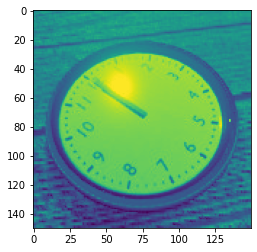

In [3]:
image = image / 255.0
image = image.reshape(image.shape + (1,))
plt.imshow(image[0])
plt.show()

In [4]:
X, X_test, y, y_test = train_test_split(image, label, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set: {X_train.shape}")
print(f"Valid set: {X_valid.shape}")
print(f"Test set: {X_test.shape}")

Train set: (11520, 150, 150, 1)
Valid set: (2880, 150, 150, 1)
Test set: (3600, 150, 150, 1)


### Regression

In [6]:
# Task: Regression
def regression_model():
    in_put = Input((150, 150, 1))
    x = Conv2D(32, (3, 3), activation="relu")(in_put)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation="relu", strides=(2, 2))(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation="relu")(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(256, activation="relu")(x)
    x = Dense(64, activation="relu")(x)
    x = Dense(1)(x)
    model = tf.keras.Model(in_put, x)
    model.summary()
    def common_sense_reg(y_true, y_pred):
        d = K.abs(y_true - y_pred)
        return (1 - (d // 6)) * (d) + (d // 6) * (12 - d)
    model.compile(optimizer="adam", loss="mse", metrics=common_sense_reg)
    return model

def label_reg(y):
    trans = y[:, 0] + np.around(y[:, 1] / 60, 2)
    return trans

y_re_train = label_reg(y_train)
y_re_valid = label_reg(y_valid)
y_re_test = label_reg(y_test)

K.clear_session()
model = regression_model()
model.fit(x=X_train, y=y_re_train, batch_size=64, epochs=30, validation_data=(X_valid, y_re_valid))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856 

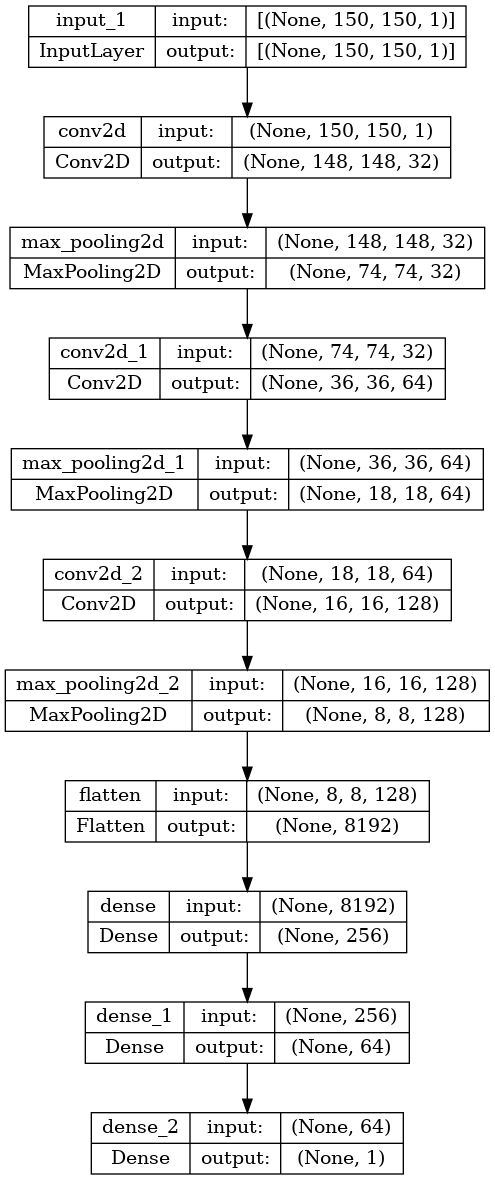

In [4]:
tf.keras.utils.plot_model(model, to_file="./fig/reg_model.png", show_shapes=True)

In [7]:
model.evaluate(X_test, y_re_test)

113/113 [==============================] - 1s 7ms/step - loss: 1.4768 - common_sense_reg: 0.7053


[1.4767894744873047, 0.7053470015525818]

### Classification

#### 24 Classes

In [3]:
K.clear_session()
data = np.load("./a2_data/images.npy")
label = np.load("./a2_data/labels.npy")

data = data/255.

In [33]:
y_c=[]
for i in range(24):
    la=np.zeros(24)
    la[i]=la[i]+1
    for j in range(750):
        y_c.append(la)

In [34]:
y_c=np.stack(y_c)
y_c=np.array(y_c,dtype=np.int32)
y_c=np.concatenate((y_c,label),axis=1)
X, X_test, y, y_test = train_test_split(data, y_c, test_size=0.2, random_state=42)
y=y[:,:24]
y_test=y_test[:,24:]
print(f"Train set: {X.shape}")
print(f"Test set: {X_test.shape}")

In [48]:
classification_model = keras.Sequential(
    [
        keras.Input(shape=(150,150,1)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu",strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",strides=2),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(64,activation=keras.layers.LeakyReLU(alpha=0.01)),
        layers.Dense(24,activation="softmax"),
    ]
)

classification_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 36, 36, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 64)        

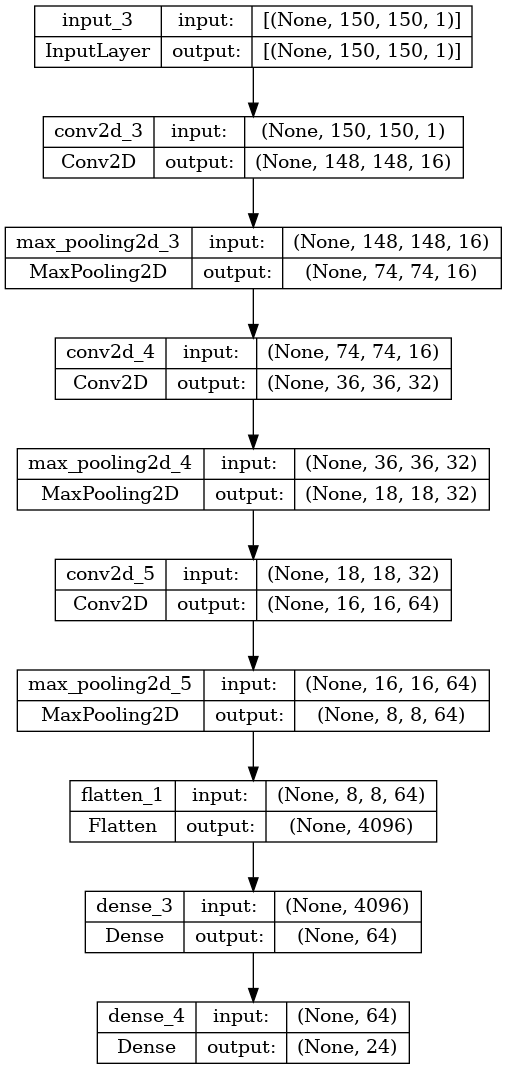

In [9]:
tf.keras.utils.plot_model(classification_model, to_file="./fig/class_model.png", show_shapes=True)

In [49]:
batch_size = 128
epochs = 40
classification_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,), metrics="accuracy", run_eagerly=True)

In [50]:
classification_model.fit(X,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/40
102/102 [==============================] - 4s 41ms/step - loss: 3.1789 - accuracy: 0.0394 - val_loss: 3.1782 - val_accuracy: 0.0389
Epoch 2/40
102/102 [==============================] - 4s 41ms/step - loss: 3.1782 - accuracy: 0.0402 - val_loss: 3.1794 - val_accuracy: 0.0410
Epoch 3/40
102/102 [==============================] - 4s 40ms/step - loss: 3.1781 - accuracy: 0.0403 - val_loss: 3.1779 - val_accuracy: 0.0410
Epoch 4/40
102/102 [==============================] - 4s 40ms/step - loss: 3.1419 - accuracy: 0.0549 - val_loss: 3.0162 - val_accuracy: 0.0743
Epoch 5/40
102/102 [==============================] - 4s 40ms/step - loss: 2.7290 - accuracy: 0.1331 - val_loss: 2.4894 - val_accuracy: 0.1708
Epoch 6/40
102/102 [==============================] - 4s 40ms/step - loss: 2.2770 - accuracy: 0.2418 - val_loss: 2.2210 - val_accuracy: 0.2264
Epoch 7/40
102/102 [==============================] - 4s 40ms/step - loss: 1.9315 - accuracy: 0.3410 - val_loss: 1.9384 - val_accuracy: 0.3153

In [51]:
output=classification_model.predict(X_test)

113/113 [==============================] - 0s 4ms/step


In [52]:
def common_sense_reg(y_true, y_pred):
    d = np.abs(y_true-y_pred)
    return (1-(d//6))*(d)+(d//6)*(12-d)

In [53]:
output=output.argmax(axis=1)
output=output*((720/24)/60)

In [58]:
y_test=y_test[:,0]+y_test[:,1]/60

In [60]:
common_sense_reg(y_test,output).mean()

0.6205694444444445

#### 72 Classes

In [8]:
y_c=[]
for i in range(72):
    la=np.zeros(72)
    la[i]=la[i]+1
    for j in range(250):
        y_c.append(la)

In [9]:
y_c=np.stack(y_c)
y_c=np.array(y_c,dtype=np.int32)
y_c=np.concatenate((y_c,label),axis=1)
X, X_test, y, y_test = train_test_split(data, y_c, test_size=0.2, random_state=42)
y=y[:,:72]
y_test=y_test[:,72:]
print(f"Train set: {X.shape}")
print(f"Test set: {X_test.shape}")

Train set: (14400, 150, 150)
Test set: (3600, 150, 150)


In [12]:
classification_model = keras.Sequential(
    [
        keras.Input(shape=(150,150,1)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu",strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",strides=2),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(64,activation=keras.layers.LeakyReLU(alpha=0.01)),
        layers.Dense(72,activation="softmax"),
    ]
)

classification_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [13]:
batch_size = 128
epochs = 40
classification_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,), metrics="accuracy", run_eagerly=True)

In [14]:
classification_model.fit(X,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/40
102/102 [==============================] - 8s 42ms/step - loss: 4.2780 - accuracy: 0.0122 - val_loss: 4.2771 - val_accuracy: 0.0188
Epoch 2/40
102/102 [==============================] - 4s 41ms/step - loss: 4.2768 - accuracy: 0.0144 - val_loss: 4.2774 - val_accuracy: 0.0104
Epoch 3/40
102/102 [==============================] - 4s 40ms/step - loss: 4.2767 - accuracy: 0.0130 - val_loss: 4.2776 - val_accuracy: 0.0090
Epoch 4/40
102/102 [==============================] - 4s 41ms/step - loss: 4.2766 - accuracy: 0.0124 - val_loss: 4.2780 - val_accuracy: 0.0188
Epoch 5/40
102/102 [==============================] - 4s 41ms/step - loss: 4.2767 - accuracy: 0.0133 - val_loss: 4.2780 - val_accuracy: 0.0181
Epoch 6/40
102/102 [==============================] - 4s 41ms/step - loss: 4.2767 - accuracy: 0.0130 - val_loss: 4.2783 - val_accuracy: 0.0160
Epoch 7/40
102/102 [==============================] - 4s 41ms/step - loss: 4.2765 - accuracy: 0.0139 - val_loss: 4.2786 - val_accuracy: 0.0090

In [19]:
output=classification_model.predict(X_test)

113/113 [==============================] - 0s 4ms/step


In [20]:
output=output.argmax(axis=1)

In [21]:
output=output*((720/72)/60)

In [22]:
def common_sense_reg(y_true, y_pred):
    d = np.abs(y_true-y_pred)
    return (1-(d//6))*(d)+(d//6)*(12-d)

In [23]:
y_test=y_test[:,0]+y_test[:,1]/60

In [25]:
common_sense_reg(y_test,output).mean()

0.9516990740740743

#### 720 classes

In [7]:
y_c=[]
for i in range(720):
    la=np.zeros(720)
    la[i]=la[i]+1
    for j in range(25):
        y_c.append(la)

In [8]:
y_c=np.stack(y_c)
y_c=np.array(y_c,dtype=np.int32)
y_c=np.concatenate((y_c,label),axis=1)
X, X_test, y, y_test = train_test_split(data, y_c, test_size=0.2, random_state=42)
y=y[:,:720]
y_test=y_test[:,720:]
print(f"Train set: {X.shape}")
print(f"Test set: {X_test.shape}")

Train set: (14400, 150, 150)
Test set: (3600, 150, 150)


In [15]:
classification_model = keras.Sequential(
    [
        keras.Input(shape=(150,150,1)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu",strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",strides=2),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(64,activation="relu"),
        layers.Dense(720,activation="softmax"),
    ]
)

classification_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 36, 36, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)        

In [16]:
batch_size = 128
epochs = 20
classification_model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,), metrics="accuracy", run_eagerly=True)

In [17]:
classification_model.fit(X,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
102/102 [==============================] - 5s 44ms/step - loss: 6.5805 - accuracy: 6.9444e-04 - val_loss: 6.5812 - val_accuracy: 6.9444e-04
Epoch 2/20
102/102 [==============================] - 4s 42ms/step - loss: 6.5792 - accuracy: 9.2593e-04 - val_loss: 6.5830 - val_accuracy: 6.9444e-04
Epoch 3/20
102/102 [==============================] - 4s 43ms/step - loss: 6.5786 - accuracy: 0.0015 - val_loss: 6.5848 - val_accuracy: 6.9444e-04
Epoch 4/20
102/102 [==============================] - 4s 42ms/step - loss: 6.5781 - accuracy: 9.2593e-04 - val_loss: 6.5866 - val_accuracy: 6.9444e-04
Epoch 5/20
102/102 [==============================] - 4s 42ms/step - loss: 6.5777 - accuracy: 0.0015 - val_loss: 6.5889 - val_accuracy: 0.0014
Epoch 6/20
102/102 [==============================] - 4s 42ms/step - loss: 6.5771 - accuracy: 0.0015 - val_loss: 6.5906 - val_accuracy: 0.0000e+00
Epoch 7/20
102/102 [==============================] - 4s 42ms/step - loss: 6.5766 - accuracy: 0.0016 - val_los

In [24]:
output=classification_model.predict(X_test)

113/113 [==============================] - 0s 4ms/step


In [25]:
output=output.argmax(axis=1)

In [26]:
output=output*((720/720)/60)

In [27]:
def common_sense_reg(y_true, y_pred):
    d = np.abs(y_true-y_pred)
    return (1-(d//6))*(d)+(d//6)*(12-d)

In [ ]:
y_test=y_test[:,0]+y_test[:,1]/60

In [29]:
common_sense_reg(y_test,output).mean()

3.030875

#### Multi-head models

In [7]:
X, X_test, y, y_test = train_test_split(data, label, test_size=0.2, random_state=42)
print(f"Train set: {X.shape}")
print(f"Test set: {X_test.shape}")

Train set: (14400, 150, 150)
Test set: (3600, 150, 150)


In [8]:
y1=y[:,0]

In [9]:
y2=y[:,1]

In [10]:
y1=tf.keras.utils.to_categorical(y1)

In [11]:
y2=y2/60

In [12]:
y_test=y_test[:,0]+y_test[:,1]/60

In [10]:
def multihead_model():
    in_put = layers.Input((150, 150, 1))
    x = layers.Conv2D(16, (3, 3), activation="relu")(in_put)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation="relu", strides=(2, 2))(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x1 = layers.Dense(64, activation="relu")(x)
    x1 = layers.Dense(12, activation="softmax",name="output1")(x1)
    x2 = layers.Dense(64,activation="relu")(x)
    x2 = layers.Dense(1,name="output2")(x2)
    model = tf.keras.Model(in_put, [x1,x2])
    return model

In [11]:
multihead_model=multihead_model()

In [20]:
multihead_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 148, 148, 16  160         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_3 (MaxPooling2D)  (None, 74, 74, 16)  0           ['conv2d_3[0][0]']               
                                                                                            

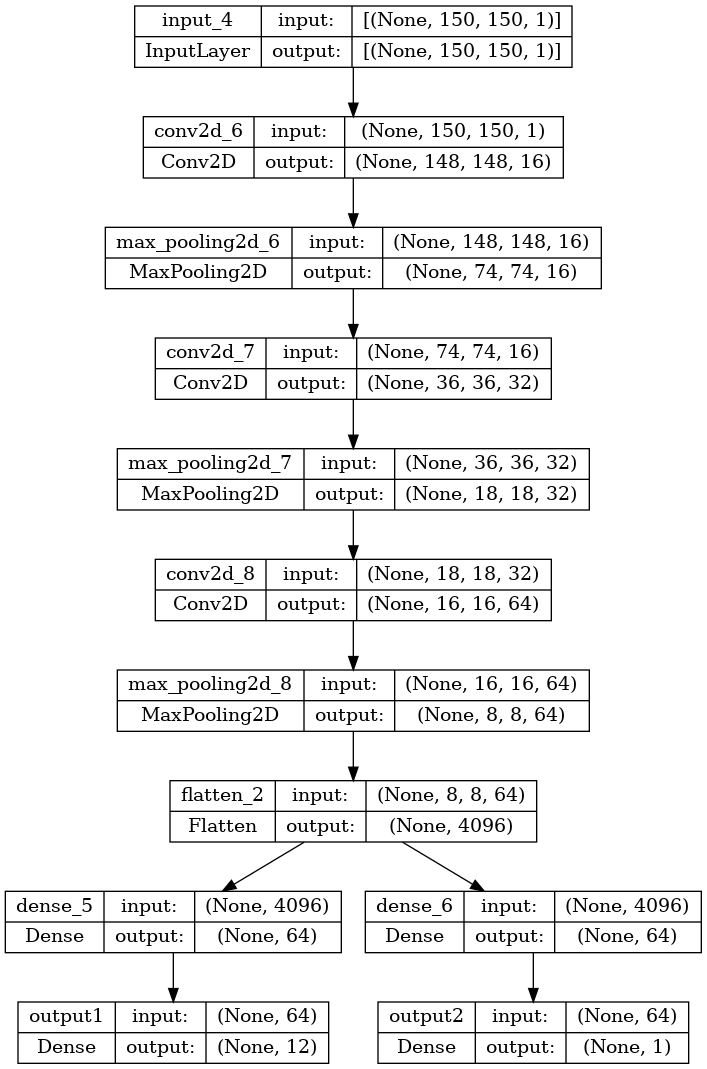

In [12]:
tf.keras.utils.plot_model(multihead_model, to_file="./fig/multi_model.png", show_shapes=True)

In [21]:
batch_size = 128
epochs = 20
multihead_model.compile(loss={"output1":"categorical_crossentropy","output2":"mse"},loss_weights={"output1":1,"output2":1}, optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,), metrics={"output1":"accuracy","output2":"mse"})

In [28]:
multihead_model.fit(X,[y1,y2], batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
102/102 [==============================] - 3s 33ms/step - loss: 1.0608 - output1_loss: 1.0297 - output2_loss: 0.0312 - output1_accuracy: 0.5890 - output2_mse: 0.0312 - val_loss: 1.2802 - val_output1_loss: 1.2347 - val_output2_loss: 0.0455 - val_output1_accuracy: 0.5146 - val_output2_mse: 0.0455
Epoch 2/20
102/102 [==============================] - 3s 32ms/step - loss: 0.9998 - output1_loss: 0.9688 - output2_loss: 0.0309 - output1_accuracy: 0.6171 - output2_mse: 0.0309 - val_loss: 1.2263 - val_output1_loss: 1.1769 - val_output2_loss: 0.0494 - val_output1_accuracy: 0.5389 - val_output2_mse: 0.0494
Epoch 3/20
102/102 [==============================] - 3s 32ms/step - loss: 0.9698 - output1_loss: 0.9404 - output2_loss: 0.0294 - output1_accuracy: 0.6260 - output2_mse: 0.0294 - val_loss: 1.2353 - val_output1_loss: 1.1943 - val_output2_loss: 0.0410 - val_output1_accuracy: 0.5222 - val_output2_mse: 0.0410
Epoch 4/20
102/102 [==============================] - 3s 32ms/step - loss: 0.92

In [29]:
output1,output2=multihead_model.predict(X_test)

113/113 [==============================] - 0s 4ms/step


In [30]:
output1=output1.argmax(axis=1)
output2=output2.reshape(-1,)

In [31]:
output=output1+output2

In [32]:
def common_sense_reg(y_true, y_pred):
    d = np.abs(y_true-y_pred)
    return (1-(d//6))*(d)+(d//6)*(12-d)

In [33]:
common_sense_reg(y_test,output).mean()

0.6160935001671315

#### Label Transformation

In [71]:
ya_hour=2*np.pi*(label[:,0]+label[:,1]/60)/12
ya_hour1=np.sin(ya_hour)
ya_hour2=np.cos(ya_hour)
y_l=np.stack((ya_hour1,ya_hour2),axis=1)
y_l=np.concatenate((y_l,label),axis=1)

In [82]:
X, X_test, y, y_test = train_test_split(data, y_l, test_size=0.2, random_state=42)
print(f"Train set: {X.shape}")
print(f"Test set: {X_test.shape}")
y=y[:,:2]
y_test=y_test[:,2:]

Train set: (14400, 150, 150)
Test set: (3600, 150, 150)


In [107]:
transformation_model = keras.Sequential(
    [
        keras.Input(shape=(150,150,1)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu",strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu",strides=2),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",strides=1),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(64,activation="relu"),
        layers.Dense(2,activation="tanh"),
    ]
)

transformation_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 36, 36, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 18, 18, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 64)        

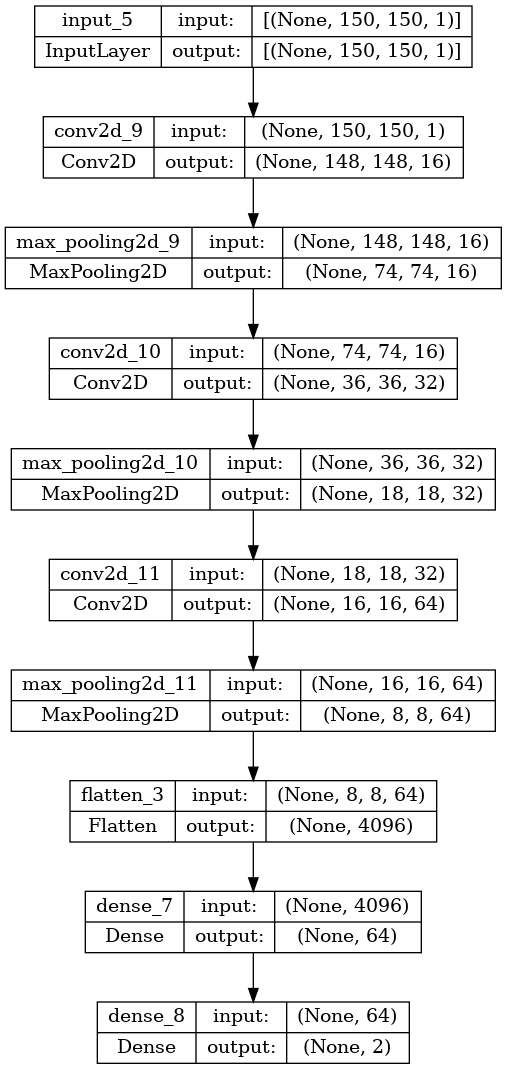

In [13]:
tf.keras.utils.plot_model(transformation_model, to_file="./fig/label_model.png", show_shapes=True)

In [108]:
batch_size = 128
epochs = 20
transformation_model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,), metrics="mse", run_eagerly=True)

In [109]:
transformation_model.fit(X,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
102/102 [==============================] - 4s 42ms/step - loss: 0.5003 - mse: 0.5003 - val_loss: 0.4982 - val_mse: 0.4982
Epoch 2/20
102/102 [==============================] - 4s 40ms/step - loss: 0.4314 - mse: 0.4314 - val_loss: 0.3519 - val_mse: 0.3519
Epoch 3/20
102/102 [==============================] - 4s 40ms/step - loss: 0.2909 - mse: 0.2909 - val_loss: 0.2527 - val_mse: 0.2527
Epoch 4/20
102/102 [==============================] - 4s 41ms/step - loss: 0.2003 - mse: 0.2003 - val_loss: 0.1646 - val_mse: 0.1646
Epoch 5/20
102/102 [==============================] - 4s 41ms/step - loss: 0.1303 - mse: 0.1303 - val_loss: 0.1198 - val_mse: 0.1198
Epoch 6/20
102/102 [==============================] - 4s 41ms/step - loss: 0.0883 - mse: 0.0883 - val_loss: 0.0857 - val_mse: 0.0857
Epoch 7/20
102/102 [==============================] - 4s 41ms/step - loss: 0.0656 - mse: 0.0656 - val_loss: 0.0724 - val_mse: 0.0724
Epoch 8/20
102/102 [==============================] - 4s 41ms/step - 

In [110]:
output=transformation_model.predict(X_test)

113/113 [==============================] - 1s 4ms/step


In [111]:
predict1=output[:,0]/np.sqrt(np.square(output[:,0])+np.square(output[:,1]))

In [112]:
predict2=output[:,1]/np.sqrt(np.square(output[:,0])+np.square(output[:,1]))

In [134]:
import math
angle=[]
for i in range(len(predict1)):
    a_acos = math.acos(predict2[i])
    if predict1[i] < 0:
        angle.append( math.degrees(-a_acos) % 360 )
    else: 
        angle.append( math.degrees(a_acos) )

In [135]:
angle=np.stack(angle)

In [139]:
time_p=12*angle/360

In [142]:
y_test=y_test[:,0]+y_test[:,1]/60

In [143]:
def common_sense_reg(y_true, y_pred):
    d = np.abs(y_true-y_pred)
    return (1-(d//6))*(d)+(d//6)*(12-d)

In [145]:
common_sense_reg(y_test,time_p).mean()

0.34466448749401635

#### Final Model

In [2]:
data = np.load("./images.npy")
label = np.load("./labels.npy")
data = data / 255.

In [3]:
ya_hour = 2 * np.pi * (label[:, 0] + label[:, 1] / 60) / 12
ya_hour1 = np.sin(ya_hour)
ya_hour2 = np.cos(ya_hour)
y_l = np.stack((ya_hour1, ya_hour2), axis=1)
y_l = np.concatenate((y_l, label), axis=1)

In [4]:
X, X_test, y, y_test = train_test_split(data, y_l, test_size=0.2, random_state=42)
print(f"Train set: {X.shape}")
print(f"Test set: {X_test.shape}")
y = y[:, :2]
y_test = y_test[:, 2:]

Train set: (14400, 150, 150)
Test set: (3600, 150, 150)


In [5]:
y_test = y_test[:, 0] + y_test[:, 1] / 60

In [14]:
K.clear_session()
final_model = keras.Sequential(
    [
        keras.Input(shape=(150,150,1)),
        layers.Conv2D(16, kernel_size=(3, 3), activation=keras.layers.LeakyReLU(alpha=0.01),strides=1,kernel_regularizer=regularizers.L2(1e-4)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation=keras.layers.LeakyReLU(alpha=0.01),strides=2,kernel_regularizer=regularizers.L2(1e-4)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation=keras.layers.LeakyReLU(alpha=0.01),strides=1,kernel_regularizer=regularizers.L2(1e-4)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.1),
        layers.Dense(64,activation=keras.layers.LeakyReLU(alpha=0.01),kernel_regularizer=regularizers.L2(1e-4)),
        layers.Normalization(axis=None),
        layers.Dense(2,activation="tanh"),
    ]
)

final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

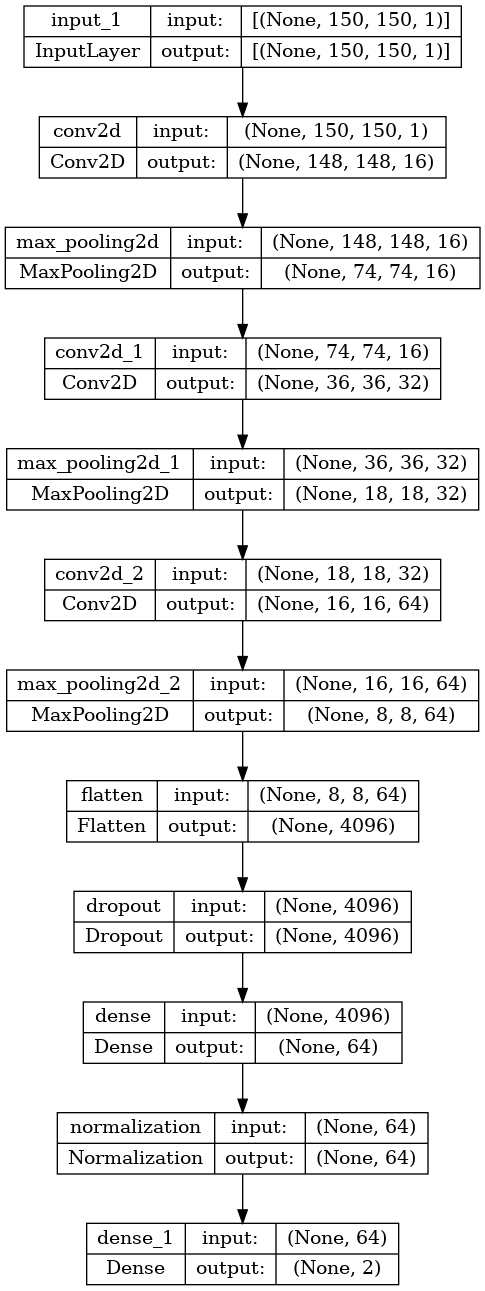

In [15]:
tf.keras.utils.plot_model(final_model, to_file="./fig/final_model.png", show_shapes=True)

In [7]:
batch_size = 128
epochs = 300
final_model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0009,), metrics="mse")

In [8]:
checkpoint_filepath = "./best_model.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True
)
final_model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[model_checkpoint_callback])

Epoch 1/300


2022-11-21 07:22:13.960250: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101


102/102 [==============================] - 6s 33ms/step - loss: 0.5136 - mse: 0.5013 - val_loss: 0.5081 - val_mse: 0.4995
Epoch 2/300
102/102 [==============================] - 2s 24ms/step - loss: 0.4903 - mse: 0.4825 - val_loss: 0.4370 - val_mse: 0.4286
Epoch 3/300
102/102 [==============================] - 2s 24ms/step - loss: 0.3835 - mse: 0.3733 - val_loss: 0.3185 - val_mse: 0.3059
Epoch 4/300
102/102 [==============================] - 2s 23ms/step - loss: 0.2636 - mse: 0.2489 - val_loss: 0.2182 - val_mse: 0.2017
Epoch 5/300
102/102 [==============================] - 2s 23ms/step - loss: 0.1879 - mse: 0.1699 - val_loss: 0.1647 - val_mse: 0.1455
Epoch 6/300
102/102 [==============================] - 2s 23ms/step - loss: 0.1407 - mse: 0.1204 - val_loss: 0.1291 - val_mse: 0.1079
Epoch 7/300
102/102 [==============================] - 2s 24ms/step - loss: 0.1103 - mse: 0.0885 - val_loss: 0.1041 - val_mse: 0.0817
Epoch 8/300
102/102 [==============================] - 2s 23ms/step - loss

In [9]:
final_model.load_weights(checkpoint_filepath)
output=final_model.predict(X_test)
predict1=output[:,0]/np.sqrt(np.square(output[:,0])+np.square(output[:,1]))
predict2=output[:,1]/np.sqrt(np.square(output[:,0])+np.square(output[:,1]))

113/113 [==============================] - 1s 4ms/step


In [10]:
angle=[]
for i in range(len(predict1)):
    a_acos = math.acos(predict2[i])
    if predict1[i] < 0:
        angle.append( math.degrees(-a_acos) % 360 )
    else: 
        angle.append( math.degrees(a_acos) )

In [11]:
angle=np.stack(angle)
time_p=12*angle/360

def common_sense_reg(y_true, y_pred):
    d = np.abs(y_true-y_pred)
    return (1-(d//6))*(d)+(d//6)*(12-d)

common_sense_reg(y_test,time_p).mean()

0.19215443193802784

## Task 3: Generative Models

In this task, we use two datasets to train the generative models and obtain new figures. We explore the effects of layers and parameters in the given notebook with MNIST. After that, we leverage the power of gnerative models on Butterfly & Moth dataset.
1. MNIST: We directly call the Tensorflow API to download the dataset. However, the original dataset is also available on this website: <https://deepai.org/dataset/mnist>.
2. Butterfly & Moth: This dataset can be download from: <https://www.kaggle.com/datasets/gpiosenka/butterfly-images40-species?resource=download>.

### MNIST

In [2]:
import os
import re
import shutil
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Conv2DTranspose, Reshape, Input

path = "./archive/"
data_path = "./data/"

In [2]:
# Download MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Preprocessing
X = np.concatenate((x_train, x_test), axis=0)
np.random.seed(42)
np.random.shuffle(X)
X = X.astype("float32") / 255.
X = X.reshape(X.shape + (1,))
print(f"The shape of dataset: {X.shape}")

The shape of dataset: (70000, 28, 28, 1)


In [3]:
# Use modified grid_plot functions in the tutorial           
def grid_plot(images, epoch="", name="", n=3, save=False, scale=False):
    if scale:
        images = (images + 1) / 2.0
    for index in range(n * n):
        plt.subplot(n, n, 1 + index)
        plt.axis('off')
        plt.imshow(images[index])
    fig = plt.gcf()
    fig.suptitle(name + '  '+ str(epoch), fontsize=14)
    if save:
        filename = 'results/generated_plot_e%03d_f.png' % (epoch+1)
        plt.savefig(filename)
        plt.close()
    plt.show()

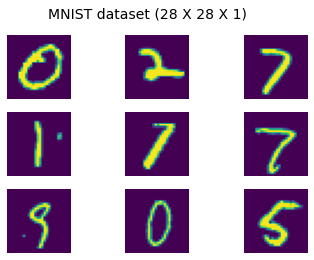

In [4]:
np.random.seed(42)
grid_plot(X[np.random.randint(0, 1000, 9)], name="MNIST dataset (28 X 28 X 1)", n=3)

In [4]:
# Use modified build_conv_net and build_deconv_net functions in the tutorial
def build_conv_net(in_shape, out_shape, out_activation='sigmoid'):
    """
    Build a basic convolutional network
    """
    in_put = Input(shape=in_shape)
    
    x = Conv2D(kernel_size=3, filters=32, padding='same', activation='relu')(in_put)
    x = Conv2D(kernel_size=3, filters=64, padding='same', activation='relu', strides=(2,2))(x)
    x = Conv2D(kernel_size=3, filters=64, padding='same', activation='relu')(x)
    x = Conv2D(kernel_size=3, filters=64, padding='same', activation='relu')(x)
    
    x = Flatten()(x)
    x = Dense(out_shape, activation=out_activation)(x)
    model = tf.keras.Model(in_put, x)
    model.summary()
    return model


def build_deconv_net(latent_dim, activation_out='sigmoid'):
    """
    Build a deconvolutional network for decoding/upscaling latent vectors

    When building the deconvolutional architecture, usually it is best to use the same layer sizes that 
    were used in the downsampling network and the Conv2DTranspose layers are used instead of Conv2D layers. 
    Using identical layers and hyperparameters ensures that the dimensionality of our output matches the
    shape of our input images. 
    """
    in_put = Input(shape=latent_dim)
    x = Dense(14 * 14 * 64)(in_put)
    x = Reshape((14, 14, 64))(x) # This matches the output size of the downsampling architecture
    x = Conv2DTranspose(32, 3, padding='same', activation='relu', strides=(2,2))(x)
    x = Conv2D(filters=1, kernel_size=3, activation=activation_out, padding='same')(x)
    model = tf.keras.Model(in_put, x)
    model.summary()
    return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 32)                401440

2022-11-19 23:43:53.159843: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-11-19 23:43:53.159907: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pikachu3): /proc/driver/nvidia/version does not exist
2022-11-19 23:43:53.160572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


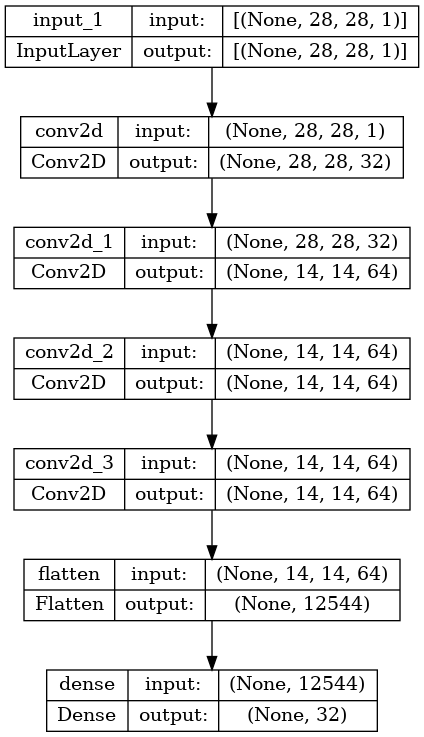

In [5]:
conv = build_conv_net(in_shape=(28, 28, 1), out_shape=32)
tf.keras.utils.plot_model(conv, to_file="./fig/conv.png", show_shapes=True)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_1 (Dense)             (None, 12544)             413952    
                                                                 
 reshape (Reshape)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 28, 28, 32)       18464     
 nspose)                                                         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)         289       
                                                                 
Total params: 432,705
Trainable params: 432,705
Non-trainable params: 0
_____________________________________________________

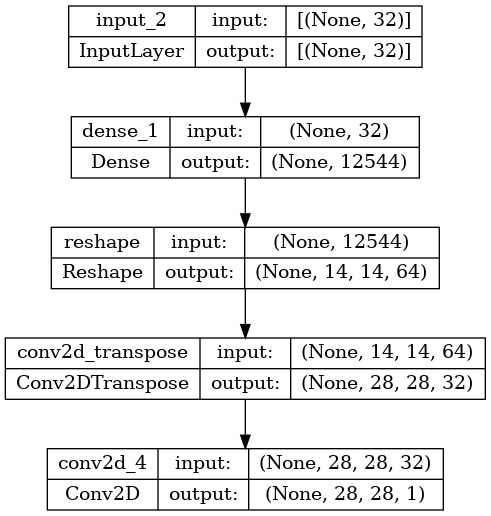

In [6]:
deconv = build_deconv_net(32)
tf.keras.utils.plot_model(deconv, to_file="./fig/deconv.png", show_shapes=True)

#### Convolutional Autoencoder (CAE)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_6 (Dense)             (None, 32)                4014

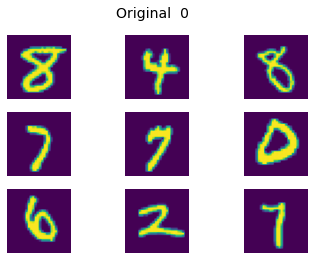

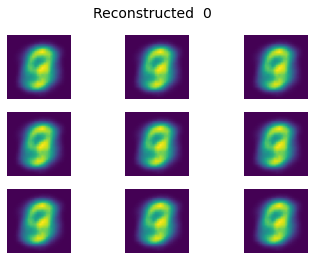


Epoch:  1


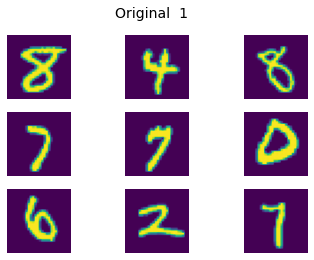

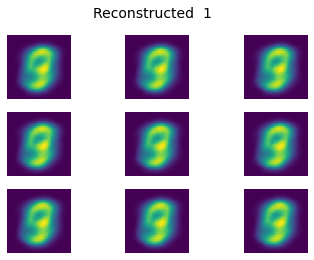


Epoch:  2


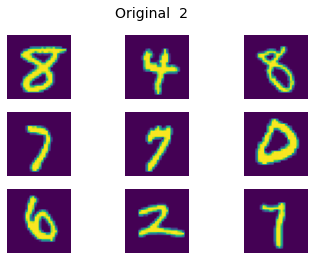

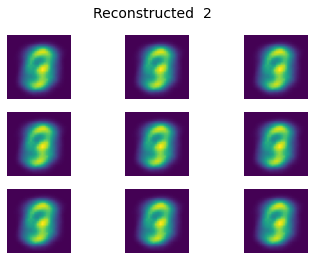


Epoch:  3


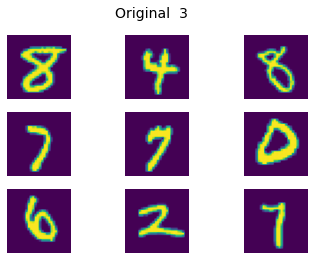

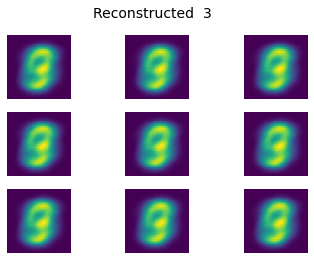


Epoch:  4


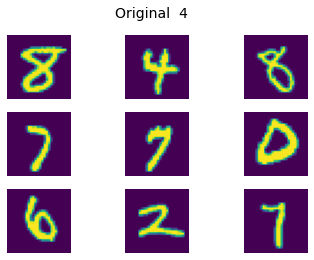

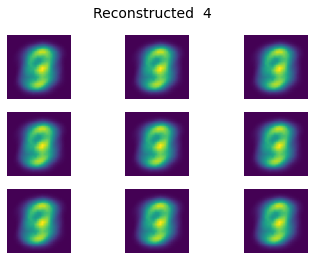


Epoch:  5


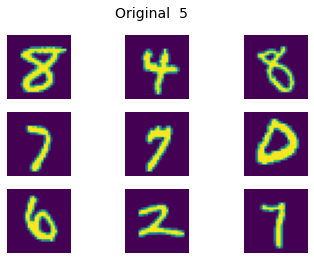

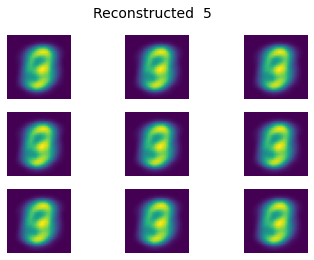


Epoch:  6


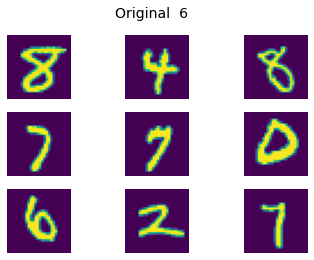

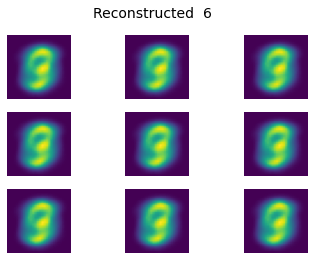


Epoch:  7


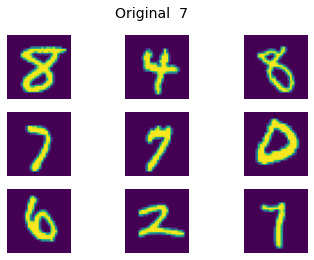

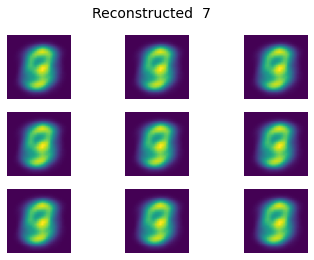


Epoch:  8


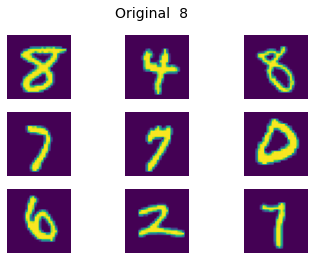

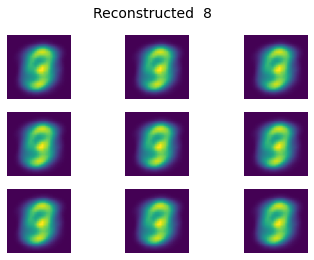


Epoch:  9


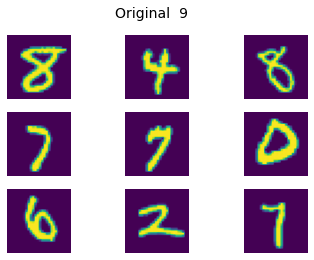

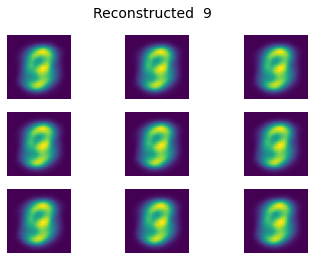


Epoch:  10


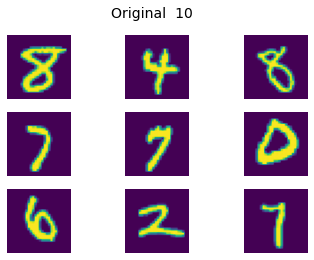

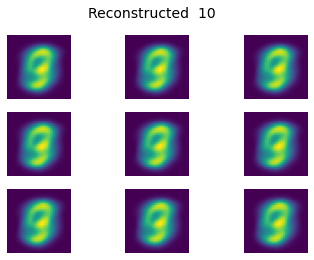

In [19]:
# CAE
# Use the build_convolutional_autoencoder function in the tutorial
def build_convolutional_autoencoder(data_shape, latent_dim):
    encoder = build_conv_net(in_shape=data_shape, out_shape=latent_dim)
    decoder = build_deconv_net(latent_dim, activation_out='sigmoid')
    autoencoder = tf.keras.Sequential([encoder, decoder])
    autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
    return autoencoder

# Defining the model dimensions and building it
image_size = X.shape[1:]
latent_dim = 32
cae = build_convolutional_autoencoder(image_size, latent_dim)

for epoch in range(0, 11):
    cae.fit(x=X, y=X, epochs=1, batch_size=64, verbose=0)
    print('\nEpoch: ', epoch)
    samples = X[:9]
    reconstructed = cae.predict(samples, verbose=0)
    grid_plot(samples, epoch, name='Original', n=3, save=False)
    grid_plot(reconstructed, epoch, name='Reconstructed', n=3, save=False)

#### Variational Autoencoders (VAEs)

In [7]:
# Use the Sampling class and the build_vae function in the tutorial
class Sampling(tf.keras.layers.Layer):
    """
    Custom layer for the variational autoencoder
    It takes two vectors as input - one for means and other for variances of the latent variables described by a multimodal gaussian
    Its output is a latent vector randomly sampled from this distribution
    """
    def call(self, inputs):
        z_mean, z_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_var) * epsilon

    
def build_vae(data_shape, latent_dim, filters=128):

    # Building the encoder - starts with a simple downsampling convolutional network  
    encoder = build_conv_net(data_shape, latent_dim*2)
    
    # Adding special sampling layer that uses the reparametrization trick 
    z_mean = Dense(latent_dim)(encoder.output)
    z_var = Dense(latent_dim)(encoder.output)
    z = Sampling()([z_mean, z_var])
    
    # Connecting the two encoder parts
    encoder = tf.keras.Model(inputs=encoder.input, outputs=z)

    # Defining the decoder which is a regular upsampling deconvolutional network
    decoder = build_deconv_net(latent_dim, activation_out='sigmoid')
    vae = tf.keras.Model(inputs=encoder.input, outputs=decoder(z))
    
    # Adding the special loss term
    kl_loss = -0.5 * tf.reduce_sum(z_var - tf.square(z_mean) - tf.exp(z_var) + 1)
    vae.add_loss(kl_loss/tf.cast(tf.keras.backend.prod(data_shape), tf.float32))

    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy')

    return encoder, decoder, vae

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                8028

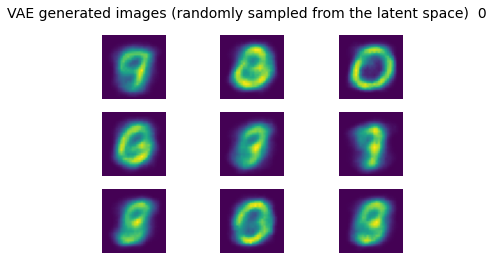

4375/4375 [==============================] - 36s 8ms/step - loss: 0.2585


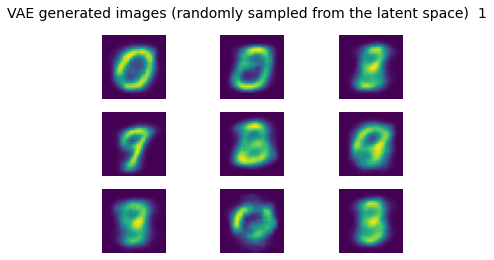

4375/4375 [==============================] - 35s 8ms/step - loss: 0.2569


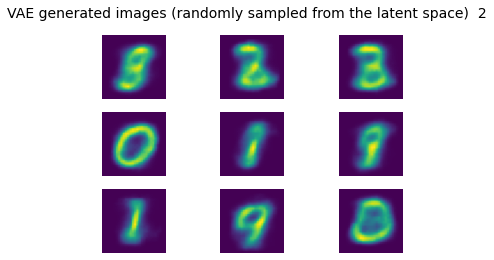

4375/4375 [==============================] - 36s 8ms/step - loss: 0.2560


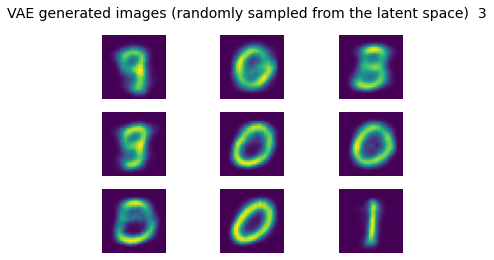

4375/4375 [==============================] - 36s 8ms/step - loss: 0.2555


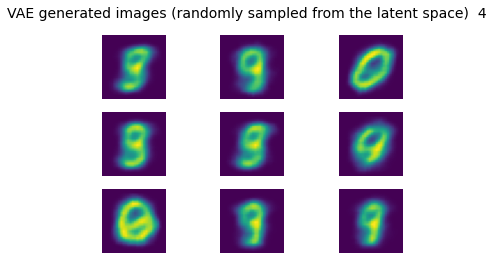

4375/4375 [==============================] - 36s 8ms/step - loss: 0.2552


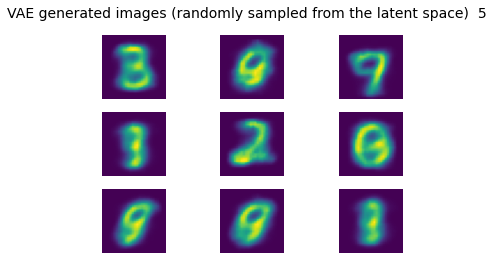

4375/4375 [==============================] - 36s 8ms/step - loss: 0.2554


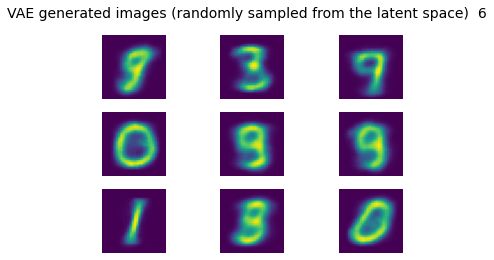

4375/4375 [==============================] - 36s 8ms/step - loss: 0.2550


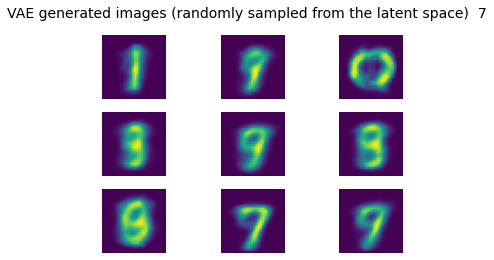

4375/4375 [==============================] - 35s 8ms/step - loss: 0.2548


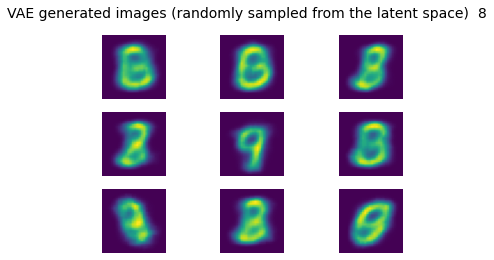

4375/4375 [==============================] - 36s 8ms/step - loss: 0.2547


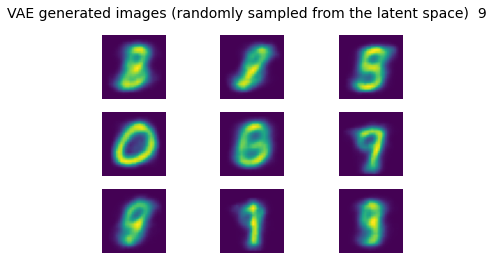

4375/4375 [==============================] - 36s 8ms/step - loss: 0.2546


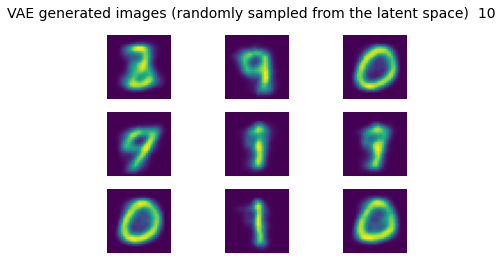

4375/4375 [==============================] - 35s 8ms/step - loss: 0.2543


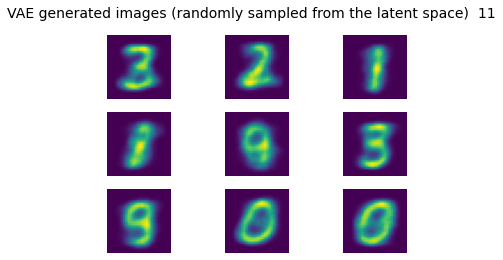

4375/4375 [==============================] - 36s 8ms/step - loss: 0.2544


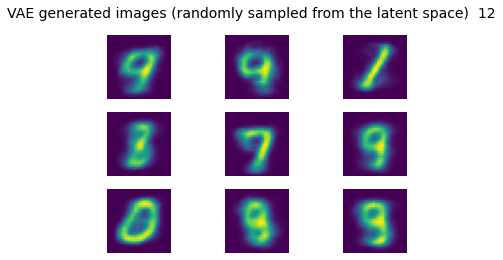

4375/4375 [==============================] - 36s 8ms/step - loss: 0.2543


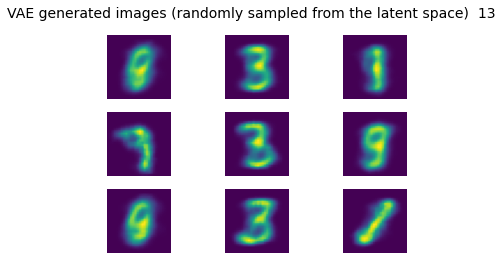

4375/4375 [==============================] - 35s 8ms/step - loss: 0.2542


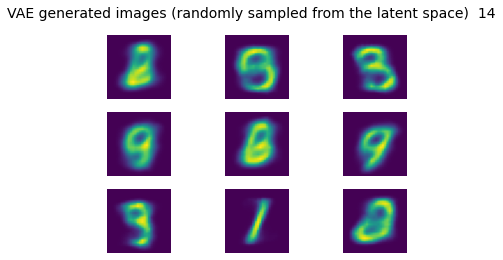

4375/4375 [==============================] - 36s 8ms/step - loss: 0.2542


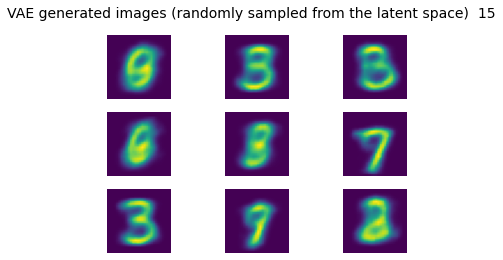

4375/4375 [==============================] - 35s 8ms/step - loss: 0.2539


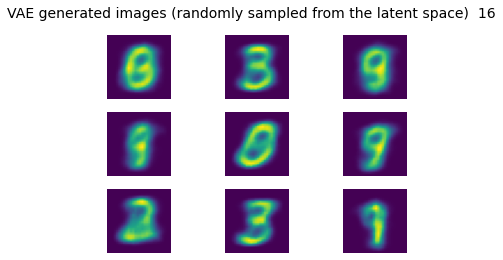

4375/4375 [==============================] - 36s 8ms/step - loss: 0.2539


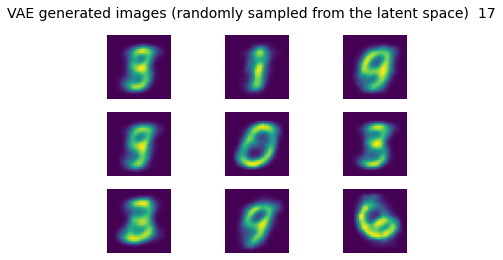

4375/4375 [==============================] - 36s 8ms/step - loss: 0.2538


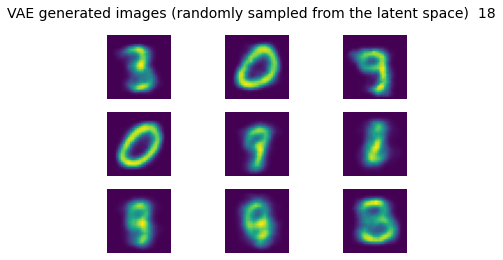

4375/4375 [==============================] - 35s 8ms/step - loss: 0.2538


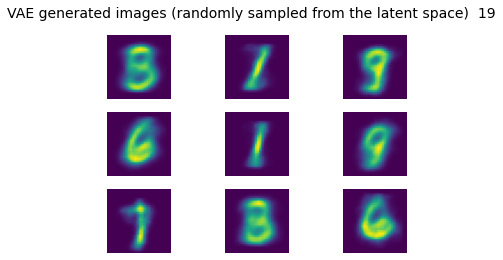

In [8]:
# Training the VAE model
latent_dim = 32
encoder, decoder, vae = build_vae(X.shape[1:], latent_dim)

# Generate random vectors that we will use to sample our latent space
for epoch in range(0, 20):
    vae.fit(x=X, y=X, epochs=1, batch_size=16, verbose=1)
    latent_vectors = np.random.randn(9, latent_dim)
    images = decoder(latent_vectors)
    grid_plot(images, epoch, name='VAE generated images (randomly sampled from the latent space)', n=3, save=False)

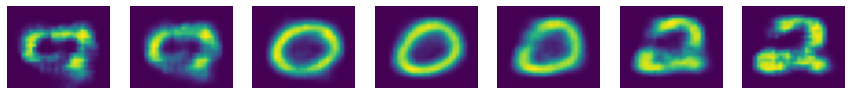

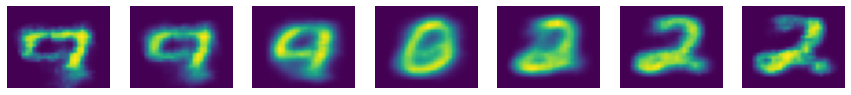

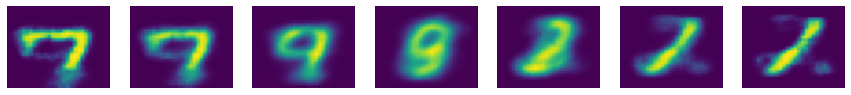

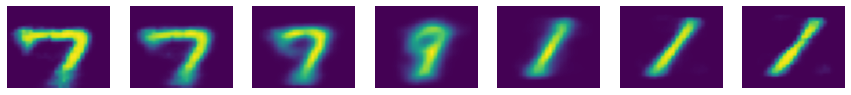

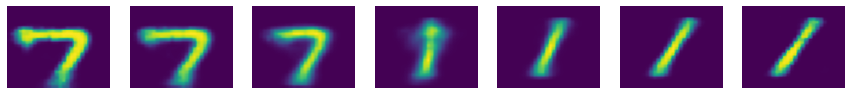

In [32]:
latent_dim = 32
for i in range(-2, 3):
    np.random.seed(42)
    latent_vectors = np.tile(np.random.randn(latent_dim), (7, 1))
    latent_vectors[:, 9] = np.linspace(-5, 5, num=7)
    latent_vectors[:, 26] = i * np.ones(7)

    images = decoder(latent_vectors)
    plt.figure(figsize = (15, 1.5))
    for index in range(7):
        plt.subplot(1, 7, index + 1)
        plt.axis('off')
        plt.imshow(images[index], aspect='auto')
    plt.show()

#### Generative Adversarial Networks (GANs)

In [28]:
# Use build_gan, run_generator, get_batch, train_gan function in the tutorial
def build_gan(data_shape, latent_dim, lr=0.0002, beta_1=0.5):
    optimizer = tf.optimizers.Adam(learning_rate=lr, beta_1=beta_1)

    # Usually the GAN generator has tanh activation function in the output layer
    generator = build_deconv_net(latent_dim, activation_out='tanh')
    
    # Build and compile the discriminator
    discriminator = build_conv_net(in_shape=data_shape, out_shape=1) # Single output for binary classification
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    # End-to-end GAN model for training the generator
    discriminator.trainable = False
    true_fake_prediction = discriminator(generator.output)
    GAN = tf.keras.Model(inputs=generator.input, outputs=true_fake_prediction)
    GAN = tf.keras.models.Sequential([generator, discriminator])
    GAN.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return discriminator, generator, GAN


def run_generator(generator, n_samples=100):
    """
    Run the generator model and generate n samples of synthetic images using random latent vectors
    """
    latent_dim = generator.layers[0].input_shape[-1]
    generator_input = np.random.randn(n_samples, latent_dim[1])

    return generator.predict(generator_input)
    

def get_batch(generator, dataset, batch_size=64):
    """
    Gets a single batch of samples (X) and labels (y) for the training the discriminator.
    One half from the real dataset (labeled as 1s), the other created by the generator model (labeled as 0s).
    """
    batch_size //= 2 # Split evenly among fake and real samples

    fake_data = run_generator(generator, n_samples=batch_size)
    real_data = dataset[np.random.randint(0, dataset.shape[0], batch_size)]

    X = np.concatenate([fake_data, real_data], axis=0)
    y = np.concatenate([np.zeros([batch_size, 1]), np.ones([batch_size, 1])], axis=0)

    return X, y


def train_gan(generator, discriminator, gan, dataset, latent_dim, n_epochs=20, batch_size=64):

    batches_per_epoch = int(dataset.shape[0] / batch_size / 2)
    for epoch in range(n_epochs):
        for batch in range(batches_per_epoch):
            
            # 1) Train discriminator both on real and synthesized images
            X, y = get_batch(generator, dataset, batch_size=batch_size)
            discriminator_loss = discriminator.train_on_batch(X, y)

            # 2) Train generator (note that now the label of synthetic images is reversed to 1)
            X_gan = np.random.randn(batch_size, latent_dim)
            y_gan = np.ones([batch_size, 1])
            generator_loss = gan.train_on_batch(X_gan, y_gan)
            
        noise = np.random.randn(16, latent_dim)
        images = generator.predict(noise)
        grid_plot(images, epoch, name='GAN generated images', n=3, save=False, scale=True)

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 256)]             0         
                                                                 
 dense_16 (Dense)            (None, 12544)             3223808   
                                                                 
 reshape_7 (Reshape)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_35 (Conv2D)          (None, 28, 28, 1)         289       
                                                                 
Total params: 3,242,561
Trainable params: 3,242,561
Non-trainable params: 0
________________________________________________

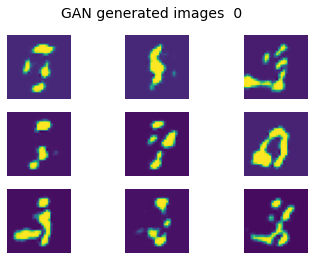

1/1 [==============================] - 0s 27ms/step


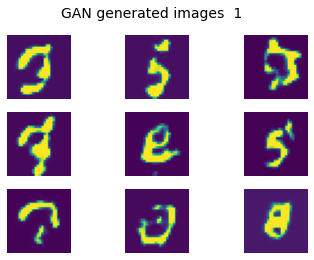

1/1 [==============================] - 0s 29ms/step


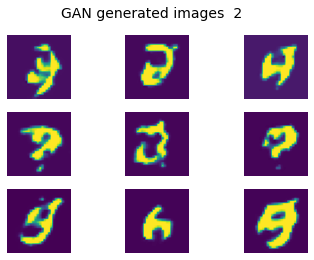

1/1 [==============================] - 0s 117ms/step


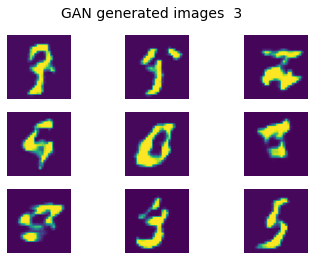

1/1 [==============================] - 0s 48ms/step


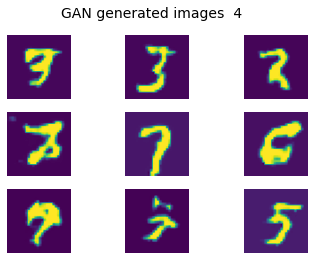

1/1 [==============================] - 0s 77ms/step


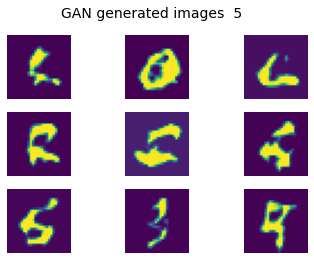

1/1 [==============================] - 0s 60ms/step


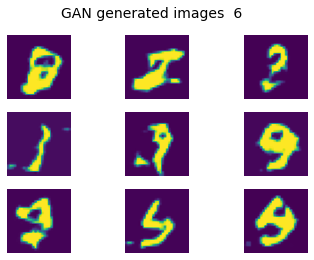

1/1 [==============================] - 0s 32ms/step


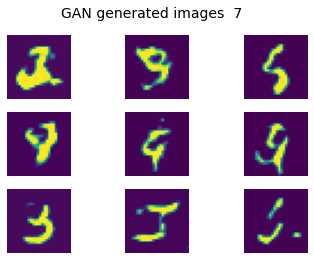

1/1 [==============================] - 0s 27ms/step


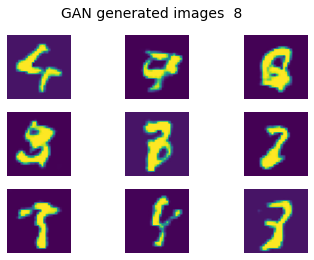

1/1 [==============================] - 0s 29ms/step


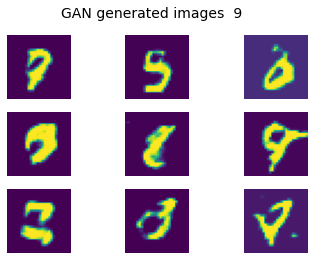

1/1 [==============================] - 0s 26ms/step


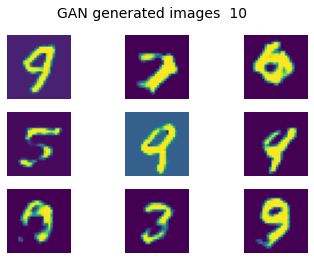

1/1 [==============================] - 0s 76ms/step


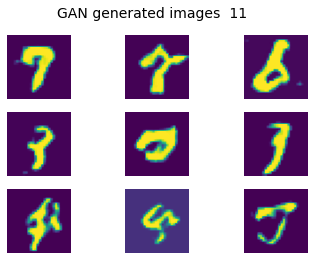

1/1 [==============================] - 0s 61ms/step


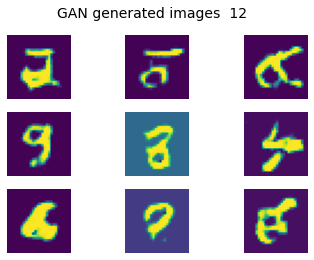

1/1 [==============================] - 0s 36ms/step


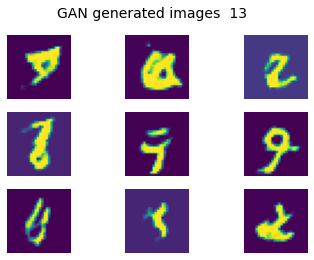

1/1 [==============================] - 0s 28ms/step


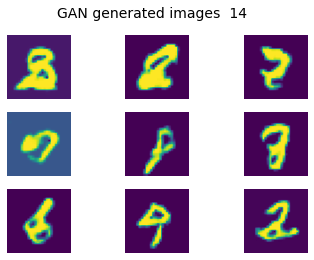

1/1 [==============================] - 0s 26ms/step


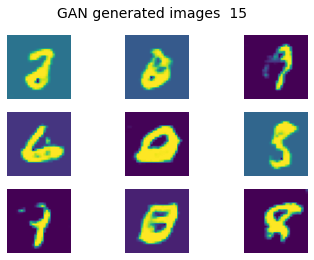

1/1 [==============================] - 0s 28ms/step


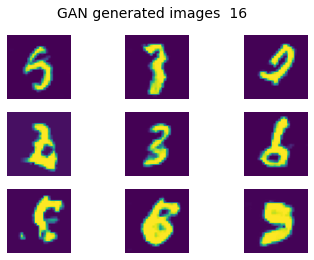

1/1 [==============================] - 0s 27ms/step


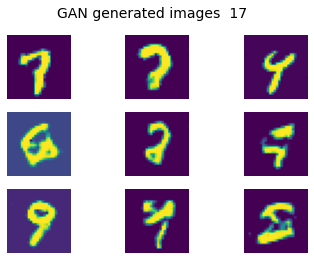

1/1 [==============================] - 0s 38ms/step


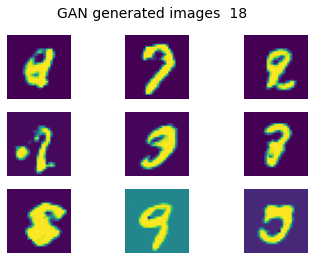

1/1 [==============================] - 0s 27ms/step


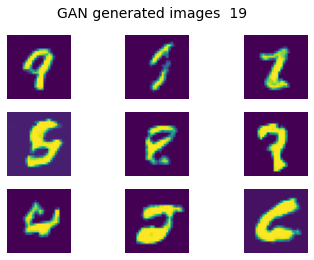

In [29]:
# Build and train the model (need around 10 epochs to start seeing some results)
latent_dim = 256
discriminator, generator, gan = build_gan(X.shape[1:], latent_dim)

train_gan(generator, discriminator, gan, X, latent_dim, n_epochs=20)

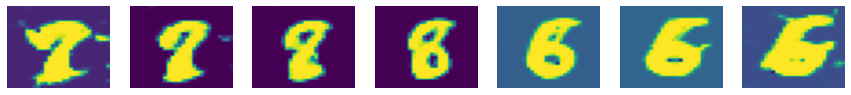

In [66]:
latent_dim = 256

np.random.seed(13)
latent_vectors = np.tile(np.random.randn(latent_dim), (7, 1))
latent_vectors[:, 0] = np.linspace(-30, 30, num=7)

images = generator(latent_vectors)
plt.figure(figsize = (15, 1.5))
for index in range(7):
    plt.subplot(1, 7, index + 1)
    plt.axis('off')
    plt.imshow(images[index], aspect='auto')
plt.show()

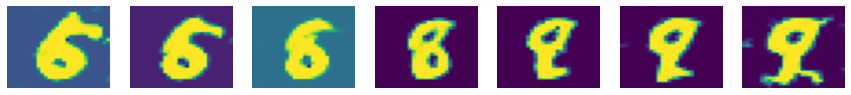

In [67]:
latent_dim = 256

np.random.seed(13)
latent_vectors = np.tile(np.random.randn(latent_dim), (7, 1))
latent_vectors[:, 119] = np.linspace(-30, 30, num=7)

images = generator(latent_vectors)
plt.figure(figsize = (15, 1.5))
for index in range(7):
    plt.subplot(1, 7, index + 1)
    plt.axis('off')
    plt.imshow(images[index], aspect='auto')
plt.show()

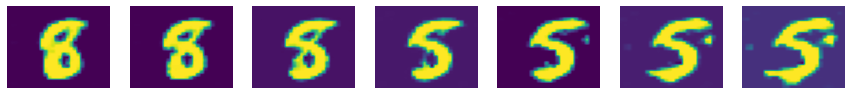

In [69]:
latent_dim = 256

np.random.seed(13)
latent_vectors = np.tile(np.random.randn(latent_dim), (7, 1))
latent_vectors[:, 125] = np.linspace(0, 30, num=7)

images = generator(latent_vectors)
plt.figure(figsize = (15, 1.5))
for index in range(7):
    plt.subplot(1, 7, index + 1)
    plt.axis('off')
    plt.imshow(images[index], aspect='auto')
plt.show()

### Butterfly & Moth

In [3]:
# Generate the data file
if not os.path.exists(data_path):
    os.makedirs(data_path)

count = 0
for obj in os.listdir(path):
    sub_path = os.path.join(path, obj)
    if os.path.isdir(sub_path):
        for cate in os.listdir(sub_path):
            cate_path = os.path.join(sub_path, cate)
            for file in os.listdir(cate_path):
                shutil.move(os.path.join(cate_path, file), os.path.join(data_path, f"{count}.jpg"))
                count += 1
                
shutil.rmtree(path)
print(f"Data: {count} images.")

# Convert .jpg file to numpy array and resize the image
data_lst = os.listdir(data_path)
image_arr = list()
for fig in data_lst:
    image = cv2.imread(os.path.join(data_path, fig))
    image = cv2.resize(image, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
    image_arr.append(np.asarray(image))
    os.remove(os.path.join(data_path, fig))
np.save(os.path.join(data_path, "part3.npy"), image_arr)

Data: 13639 images.


In [3]:
# Use modified load_real_samples and grid_plot functions in the tutorial
def load_real_samples(scale=False):
    X = np.load(os.path.join(data_path, "part3.npy"))
    if scale:
        X = (X - 127.5) * 2
    return X / 255.
                
    
def grid_plot(images, epoch="", name="", n=3, save=False, scale=False):
    if scale:
        images = (images + 1) / 2.0
    for index in range(n * n):
        plt.subplot(n, n, 1 + index)
        plt.axis('off')
        plt.imshow(images[index])
    fig = plt.gcf()
    fig.suptitle(name + '  '+ str(epoch), fontsize=14)
    if save:
        filename = 'results/generated_plot_e%03d_f.png' % (epoch+1)
        plt.savefig(filename)
        plt.close()
    plt.show()

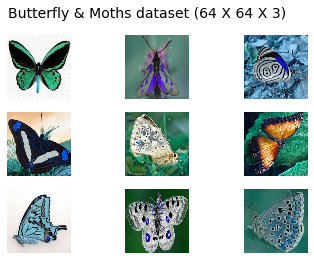

In [4]:
dataset = load_real_samples()
np.random.seed(42)
grid_plot(dataset[np.random.randint(0, 1000, 9)], name="Butterfly & Moths dataset (64 X 64 X 3)", n=3)

In [5]:
# Use build_conv_net and build_deconv_net functions in the tutorial
def build_conv_net(in_shape, out_shape, n_downsampling_layers=4, filters=128, out_activation='sigmoid'):
    """
    Build a basic convolutional network
    """
    model = tf.keras.Sequential()
    default_args=dict(kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')

    model.add(Conv2D(input_shape=in_shape, **default_args, filters=filters))

    for _ in range(n_downsampling_layers):
        model.add(Conv2D(**default_args, filters=filters))

    model.add(Flatten())
    model.add(Dense(out_shape, activation=out_activation) )
    model.summary()
    return model


def build_deconv_net(latent_dim, n_upsampling_layers=4, filters=128, activation_out='sigmoid'):
    """
    Build a deconvolutional network for decoding/upscaling latent vectors

    When building the deconvolutional architecture, usually it is best to use the same layer sizes that 
    were used in the downsampling network and the Conv2DTranspose layers are used instead of Conv2D layers. 
    Using identical layers and hyperparameters ensures that the dimensionality of our output matches the
    shape of our input images. 
    """
    model = tf.keras.Sequential()
    model.add(Dense(4 * 4 * 128, input_dim=latent_dim)) 
    model.add(Reshape((4, 4, 128))) # This matches the output size of the downsampling architecture
    default_args=dict(kernel_size=(3,3), strides=(2,2), padding='same', activation='relu')
    
    for i in range(n_upsampling_layers):
        model.add(Conv2DTranspose(**default_args, filters=filters))

    # This last convolutional layer converts back to 3 channel RGB image
    model.add(Conv2D(filters=3, kernel_size=(3,3), activation=activation_out, padding='same'))
    model.summary()
    return model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 conv2d_8 (Conv2D)           (None, 2, 2, 128)         147584    
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)              

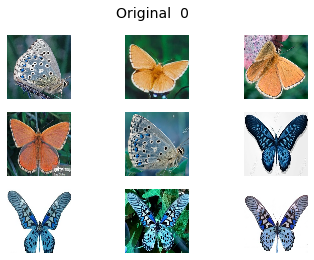

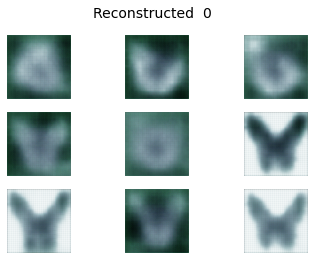


Epoch:  2


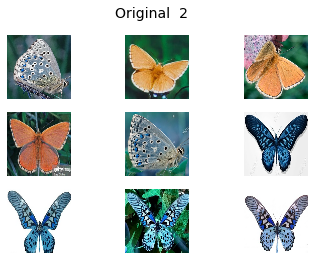

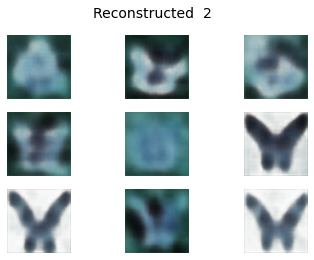


Epoch:  4


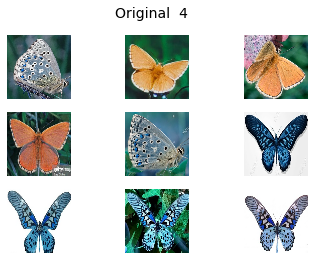

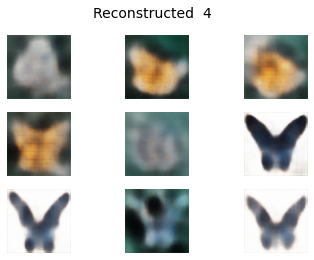


Epoch:  6


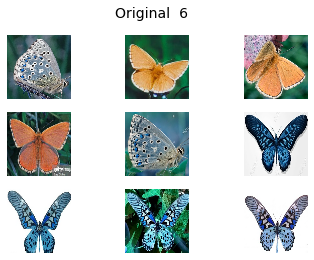

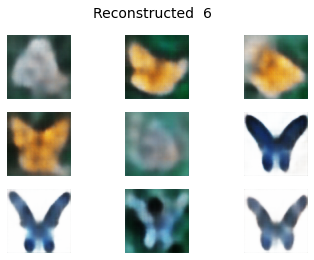


Epoch:  8


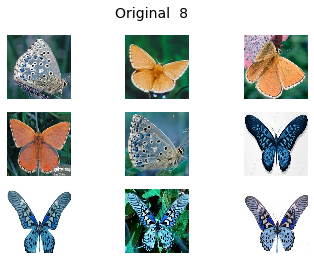

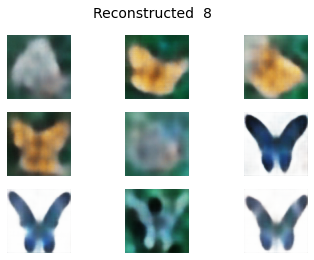


Epoch:  10


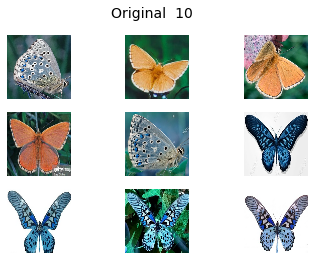

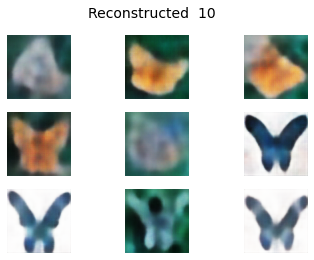

In [7]:
# CAE
# Use the build_convolutional_autoencoder function in the tutorial
def build_convolutional_autoencoder(data_shape, latent_dim, filters=128):
    encoder = build_conv_net(in_shape=data_shape, out_shape=latent_dim, filters=filters)
    decoder = build_deconv_net(latent_dim, activation_out='sigmoid', filters=filters)
    autoencoder = tf.keras.Sequential([encoder, decoder])
    autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
    return autoencoder

# Defining the model dimensions and building it
image_size = dataset.shape[1:]
latent_dim = 512
num_filters = 128
cae = build_convolutional_autoencoder(image_size, latent_dim, num_filters)

for epoch in range(0, 11):
    cae.fit(x=dataset, y=dataset, epochs=1, batch_size=64, verbose=0)
    if epoch % 2 == 0:
        print('\nEpoch: ', epoch)
        samples = dataset[:9]
        reconstructed = cae.predict(samples, verbose=0)
        grid_plot(samples, epoch, name='Original', n=3, save=False)
        grid_plot(reconstructed, epoch, name='Reconstructed', n=3, save=False)

In [6]:
# Use the Sampling class and the build_vae function in the tutorial
class Sampling(tf.keras.layers.Layer):
    """
    Custom layer for the variational autoencoder
    It takes two vectors as input - one for means and other for variances of the latent variables described by a multimodal gaussian
    Its output is a latent vector randomly sampled from this distribution
    """
    def call(self, inputs):
        z_mean, z_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_var) * epsilon

    
def build_vae(data_shape, latent_dim, filters=128):

    # Building the encoder - starts with a simple downsampling convolutional network  
    encoder = build_conv_net(data_shape, latent_dim*2, filters=filters)
    
    # Adding special sampling layer that uses the reparametrization trick 
    z_mean = Dense(latent_dim)(encoder.output)
    z_var = Dense(latent_dim)(encoder.output)
    z = Sampling()([z_mean, z_var])
    
    # Connecting the two encoder parts
    encoder = tf.keras.Model(inputs=encoder.input, outputs=z)

    # Defining the decoder which is a regular upsampling deconvolutional network
    decoder = build_deconv_net(latent_dim, activation_out='sigmoid', filters=filters)
    vae = tf.keras.Model(inputs=encoder.input, outputs=decoder(z))
    
    # Adding the special loss term
    kl_loss = -0.5 * tf.reduce_sum(z_var - tf.square(z_mean) - tf.exp(z_var) + 1)
    vae.add_loss(kl_loss/tf.cast(tf.keras.backend.prod(data_shape), tf.float32))

    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='binary_crossentropy')

    return encoder, decoder, vae

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 conv2d_13 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
 conv2d_14 (Conv2D)          (None, 2, 2, 128)         147584    
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 64)               

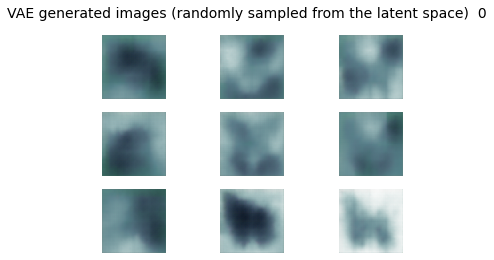

1705/1705 [==============================] - 21s 12ms/step - loss: 0.6088


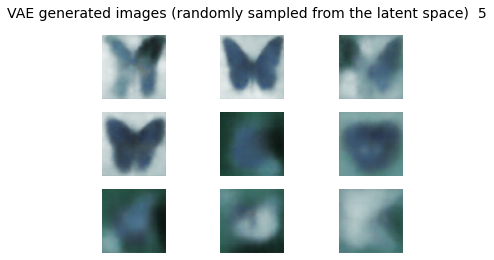

1705/1705 [==============================] - 22s 13ms/step - loss: 0.6038


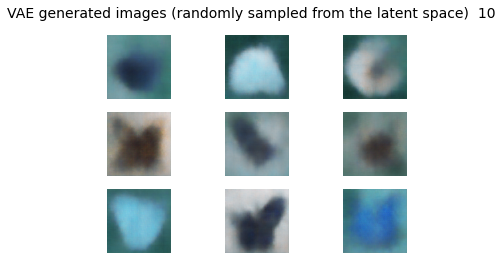

1705/1705 [==============================] - 22s 13ms/step - loss: 0.6022


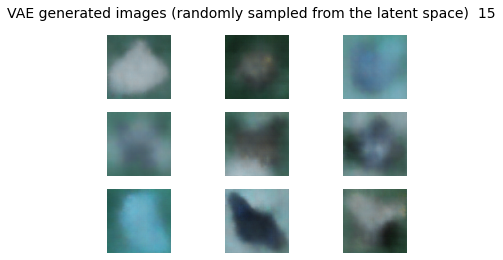

1705/1705 [==============================] - 21s 12ms/step - loss: 0.6009


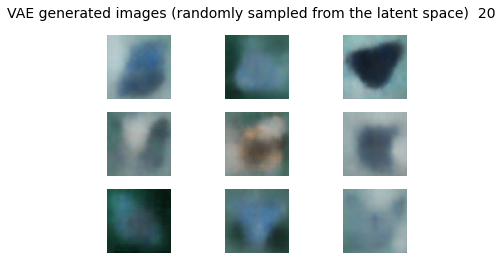

1705/1705 [==============================] - 22s 13ms/step - loss: 0.6000


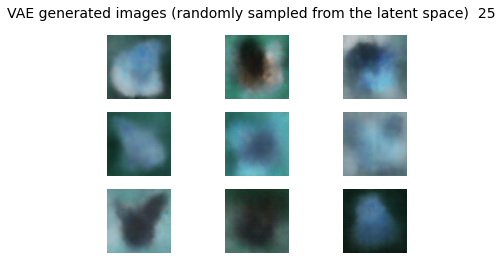

1705/1705 [==============================] - 21s 13ms/step - loss: 0.5993


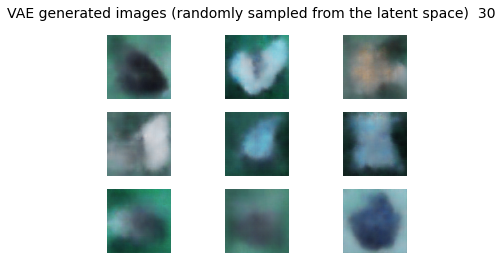

1705/1705 [==============================] - 20s 12ms/step - loss: 0.5989


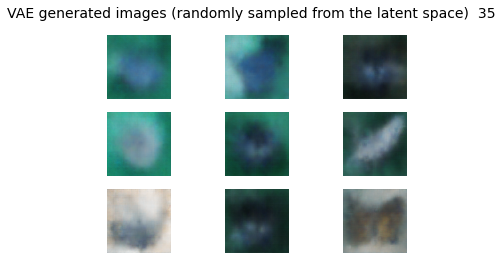

1705/1705 [==============================] - 20s 12ms/step - loss: 0.5985


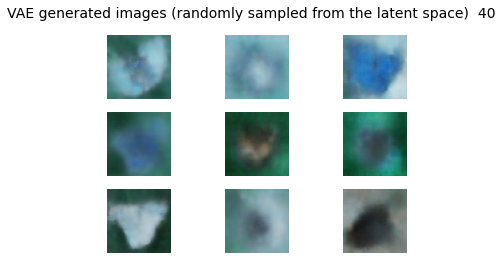

1705/1705 [==============================] - 21s 12ms/step - loss: 0.5980


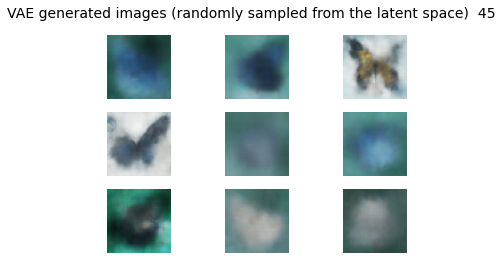

1705/1705 [==============================] - 23s 13ms/step - loss: 0.5977


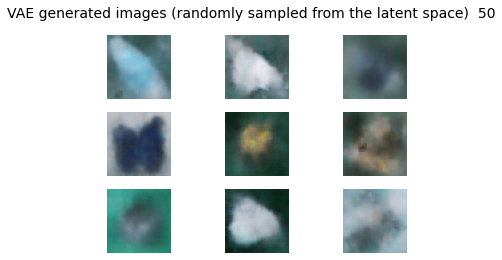

1705/1705 [==============================] - 22s 13ms/step - loss: 0.5974


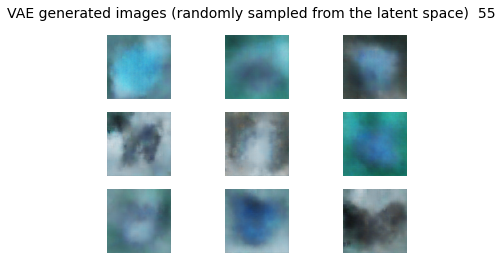

1705/1705 [==============================] - 21s 12ms/step - loss: 0.5971


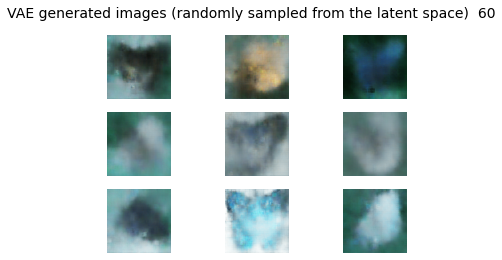

1705/1705 [==============================] - 22s 13ms/step - loss: 0.5969


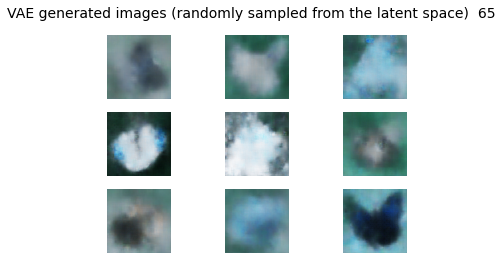

1705/1705 [==============================] - 22s 13ms/step - loss: 0.5967


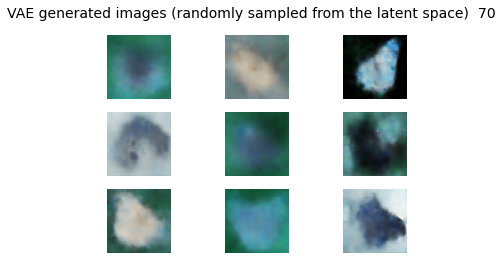

1705/1705 [==============================] - 21s 12ms/step - loss: 0.5965


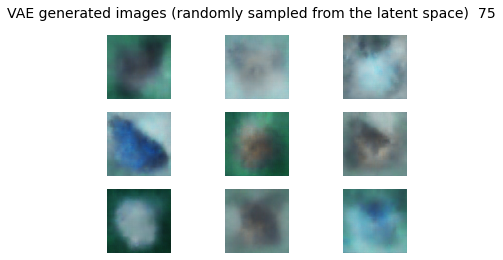

1705/1705 [==============================] - 20s 12ms/step - loss: 0.5962


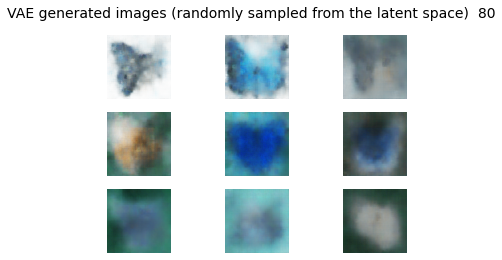

1705/1705 [==============================] - 22s 13ms/step - loss: 0.5961


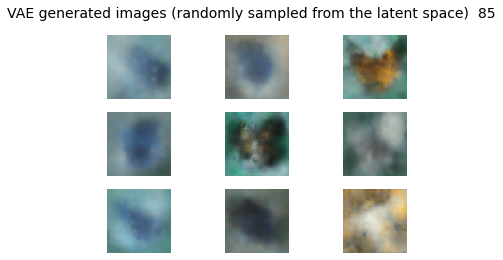

1705/1705 [==============================] - 21s 12ms/step - loss: 0.5960


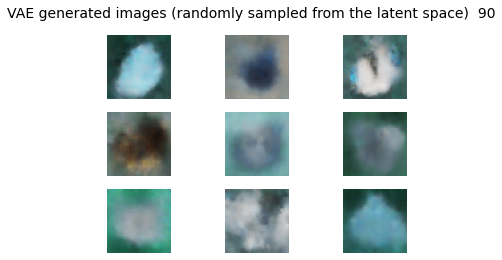

1705/1705 [==============================] - 22s 13ms/step - loss: 0.5959


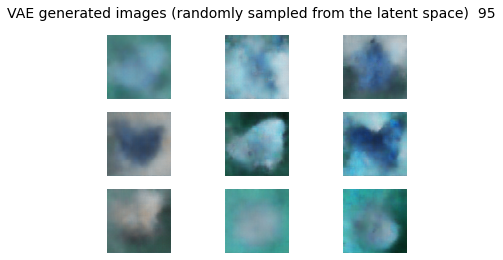

1705/1705 [==============================] - 23s 14ms/step - loss: 0.5957


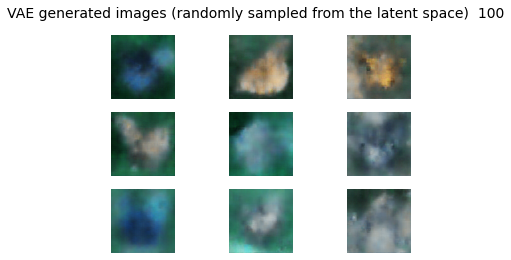

In [9]:
# Training the VAE model
latent_dim = 32
encoder, decoder, vae = build_vae(dataset.shape[1:], latent_dim, filters=128)

# Generate random vectors that we will use to sample our latent space
for epoch in range(0, 101):
    vae.fit(x=dataset, y=dataset, epochs=1, batch_size=8, verbose=1)
    if epoch % 5 == 0:
        decoder.save_weights(f'./vae-models/checkpoint{epoch}')
        latent_vectors = np.random.randn(9, latent_dim)
        images = decoder(latent_vectors)
        grid_plot(images, epoch, name='VAE generated images (randomly sampled from the latent space)', n=3, save=False)

In [96]:
latent_dim = 32
_encoder, vae_decoder, _vae = build_vae(dataset.shape[1:], latent_dim, filters=128)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 conv2d_55 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 conv2d_56 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 conv2d_57 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
 conv2d_58 (Conv2D)          (None, 2, 2, 128)         147584    
                                                                 
 flatten_9 (Flatten)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 64)              

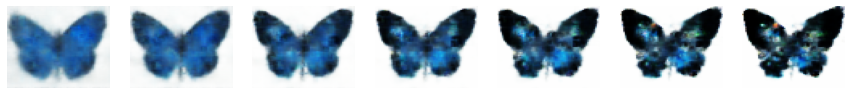

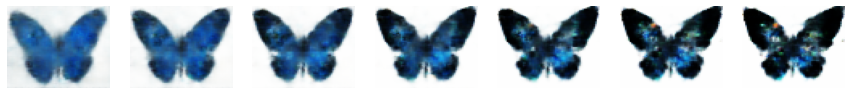

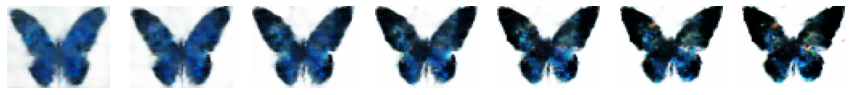

In [105]:
vae_decoder.load_weights('./vae-models/checkpoint100')

for i in range(-1, 5, 2):
    np.random.seed(227)
    latent_vectors = np.tile(np.random.randn(latent_dim), (7, 1))
    latent_vectors[:, 5] = np.linspace(1.5, 7.5, num=7)
    latent_vectors[:, 28] = i * np.ones(7)

    images = vae_decoder(latent_vectors)
    plt.figure(figsize = (15, 1.5))
    for index in range(7):
        plt.subplot(1, 7, index + 1)
        plt.axis('off')
        plt.imshow(images[index], aspect='auto')
    plt.show()

In [30]:
# Use build_gan, run_generator, get_batch, train_gan function in the tutorial
def build_gan(data_shape, latent_dim, filters=128, lr=0.0002, beta_1=0.5):
    optimizer = tf.optimizers.Adam(learning_rate=lr, beta_1=beta_1)

    # Usually the GAN generator has tanh activation function in the output layer
    generator = build_deconv_net(latent_dim, activation_out='tanh', filters=filters)
    
    # Build and compile the discriminator
    discriminator = build_conv_net(in_shape=data_shape, out_shape=1, filters=filters) # Single output for binary classification
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    # End-to-end GAN model for training the generator
    discriminator.trainable = False
    true_fake_prediction = discriminator(generator.output)
    GAN = tf.keras.Model(inputs=generator.input, outputs=true_fake_prediction)
    GAN = tf.keras.models.Sequential([generator, discriminator])
    GAN.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return discriminator, generator, GAN


def run_generator(generator, n_samples=100):
    """
    Run the generator model and generate n samples of synthetic images using random latent vectors
    """
    latent_dim = generator.layers[0].input_shape[-1]
    generator_input = np.random.randn(n_samples, latent_dim)

    return generator.predict(generator_input)
    

def get_batch(generator, dataset, batch_size=64):
    """
    Gets a single batch of samples (X) and labels (y) for the training the discriminator.
    One half from the real dataset (labeled as 1s), the other created by the generator model (labeled as 0s).
    """
    batch_size //= 2 # Split evenly among fake and real samples

    fake_data = run_generator(generator, n_samples=batch_size)
    real_data = dataset[np.random.randint(0, dataset.shape[0], batch_size)]

    X = np.concatenate([fake_data, real_data], axis=0)
    y = np.concatenate([np.zeros([batch_size, 1]), np.ones([batch_size, 1])], axis=0)

    return X, y


def train_gan(generator, discriminator, gan, dataset, latent_dim, n_epochs=20, batch_size=64):

    batches_per_epoch = int(dataset.shape[0] / batch_size / 2)
    for epoch in range(n_epochs):
        for batch in range(batches_per_epoch):
            
            # 1) Train discriminator both on real and synthesized images
            X, y = get_batch(generator, dataset, batch_size=batch_size)
            discriminator_loss = discriminator.train_on_batch(X, y)

            # 2) Train generator (note that now the label of synthetic images is reversed to 1)
            X_gan = np.random.randn(batch_size, latent_dim)
            y_gan = np.ones([batch_size, 1])
            generator_loss = gan.train_on_batch(X_gan, y_gan)
            
        if epoch % 5 == 0:
            generator.save_weights(f'./gan-models/checkpoint{epoch + 251}')
            noise = np.random.randn(16, latent_dim)
            images = generator.predict(noise)
            grid_plot(images, epoch + 251, name='GAN generated images', n=3, save=False, scale=True)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 2048)              526336    
                                                                 
 reshape_7 (Reshape)         (None, 4, 4, 128)         0         
                                                                 
 conv2d_transpose_28 (Conv2D  (None, 8, 8, 128)        147584    
 Transpose)                                                      
                                                                 
 conv2d_transpose_29 (Conv2D  (None, 16, 16, 128)      147584    
 Transpose)                                                      
                                                                 
 conv2d_transpose_30 (Conv2D  (None, 32, 32, 128)      147584    
 Transpose)                                                      
                                                     

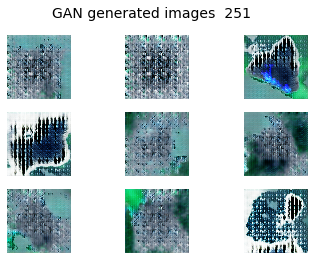

In [31]:
# Build and train the model (need around 10 epochs to start seeing some results)
latent_dim = 256
discriminator, generator, gan = build_gan(dataset.shape[1:], latent_dim, filters=128)
dataset_scaled = load_real_samples(scale=True)
generator.load_weights('./gan-models/checkpoint250')

train_gan(generator, discriminator, gan, dataset_scaled, latent_dim, n_epochs=100)

In [32]:
_discriminator, gan_generator, _gan = build_gan(dataset.shape[1:], latent_dim, filters=128)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2048)              526336    
                                                                 
 reshape_8 (Reshape)         (None, 4, 4, 128)         0         
                                                                 
 conv2d_transpose_32 (Conv2D  (None, 8, 8, 128)        147584    
 Transpose)                                                      
                                                                 
 conv2d_transpose_33 (Conv2D  (None, 16, 16, 128)      147584    
 Transpose)                                                      
                                                                 
 conv2d_transpose_34 (Conv2D  (None, 32, 32, 128)      147584    
 Transpose)                                                      
                                                     

1/1 [==============================] - 0s 37ms/step


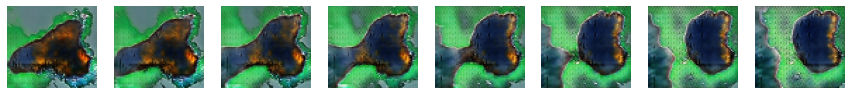

In [112]:
gan_generator.load_weights('./gan-models/checkpoint250')
latent_dim = 256

#1325-250, 39:0-16-14
np.random.seed(1325)
latent_vectors = np.tile(np.random.randn(latent_dim), (8, 1))
latent_vectors[:, 39] = np.linspace(0.0, 16.0, num=8)

images = gan_generator.predict(latent_vectors)
images = 0.5 * images + 0.5
plt.figure(figsize = (15, 1.5))
for index in range(8):
    plt.subplot(1, 8, index + 1)
    plt.axis('off')
    plt.imshow(images[index], aspect='auto')
plt.show()